In [215]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_rows',10)

In [2]:
continuous_columns = ['price','sqft_living','sq_lot','condition','grade','sqft_above','yr_built', 'lat','long']
categorical_columns = ['bedrooms','bathrooms','floors','waterfront','sqft_basement','yr_renovated']

In [3]:
#columns to be dropped
dropped_columns = ['id','date','view','sqft_living15','sqft_lot15']

In [4]:
#df.loc[(df.lat <47.2) & (df.long > -121.8)]
# want to use longitudes less than -121.647

In [5]:
#plt.scatter(df.long,df.lat)

In [6]:
df = pd.read_csv('data/kc_house_data.csv')

# Data Cleaning

## Dropping Unwanted Columns

In [7]:
df = df.drop(columns=dropped_columns)

In [8]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [9]:
for col in df.columns:
    print(col,": ",df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  2376
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  3842
zipcode :  0
lat :  0
long :  0


In [10]:
df.waterfront.isna()

0         True
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595     True
21596    False
Name: waterfront, Length: 21597, dtype: bool

In [11]:
df.waterfront[0]

nan

In [12]:
df.yr_renovated.isna()

0        False
1        False
2         True
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: yr_renovated, Length: 21597, dtype: bool

In [13]:
df.yr_renovated[2]

nan

## filling NA with 0, converting these to categorical later if needed

In [14]:
df = df.fillna(0)

In [15]:
for col in df.columns:
    print(col,": ",df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  0
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  0
zipcode :  0
lat :  0
long :  0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
dtypes: float64(7), int64(8), object(1)
memory usage: 2.6+ MB


In [17]:
df.loc[df.sqft_basement == '?']

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
6       257500.0         3       2.25         1715      6819     2.0   
18      189000.0         2       1.00         1200      9850     1.0   
42      861990.0         5       2.75         3595      5639     2.0   
79      720000.0         4       2.50         3450     39683     2.0   
112     272500.0         3       1.75         1540     12600     1.0   
...          ...       ...        ...          ...       ...     ...   
21442   504600.0         5       3.00         2360      5000     1.0   
21447   337500.0         4       2.50         2330      4907     2.0   
21473   352500.0         2       2.50          980      1010     3.0   
21519   332000.0         4       2.50         2380      5737     2.0   
21581  1580000.0         4       3.25         3410     10125     2.0   

       waterfront  condition  grade  sqft_above sqft_basement  yr_built  \
6             0.0          3      7        1715             ?      1995   
18            0.0          4      7        1200             ?      1921   
42            0.0          3      9        3595             ?      2014   
79            0.0          3     10        3450             ?      2002   
112           0.0          4      7        1160             ?      1980   
...           ...        ...    ...         ...           ...       ...   
21442         0.0          3      7        1390             ?      2008   
21447         0.0          3      7        2330             ?      2013   
21473         0.0          3      8         980             ?      2008   
21519         0.0          3      7        2380             ?      2010   
21581         0.0          3     10        3410             ?      2007   

       yr_renovated  zipcode      lat     long  
6               0.0    98003  47.3097 -122.327  
18              0.0    98002  47.3089 -122.210  
42              0.0    98053  47.6848 -122.016  
79              0.0    98010  47.3420 -122.025  
112             0.0    98038  47.3624 -122.031  
...             ...      ...      ...      ...  
21442           0.0    98103  47.6931 -122.330  
21447           0.0    98042  47.3590 -122.081  
21473           0.0    98117  47.6844 -122.387  
21519           0.0    98023  47.2815 -122.356  
21581           0.0    98040  47.5653 -122.223  

[454 rows x 16 columns]

In [18]:
df = df.replace(to_replace="?",value=0)

In [19]:
df.sqft_basement = df.sqft_basement.astype(float)

In [20]:
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [21]:
#handling the 33 bedrooms

In [22]:
df = df.drop(df.loc[df.bedrooms ==33].index)

# Exploring the Data

## Visualizations

In [23]:
len(df.columns)

16

In [24]:
sns.set_style("darkgrid")

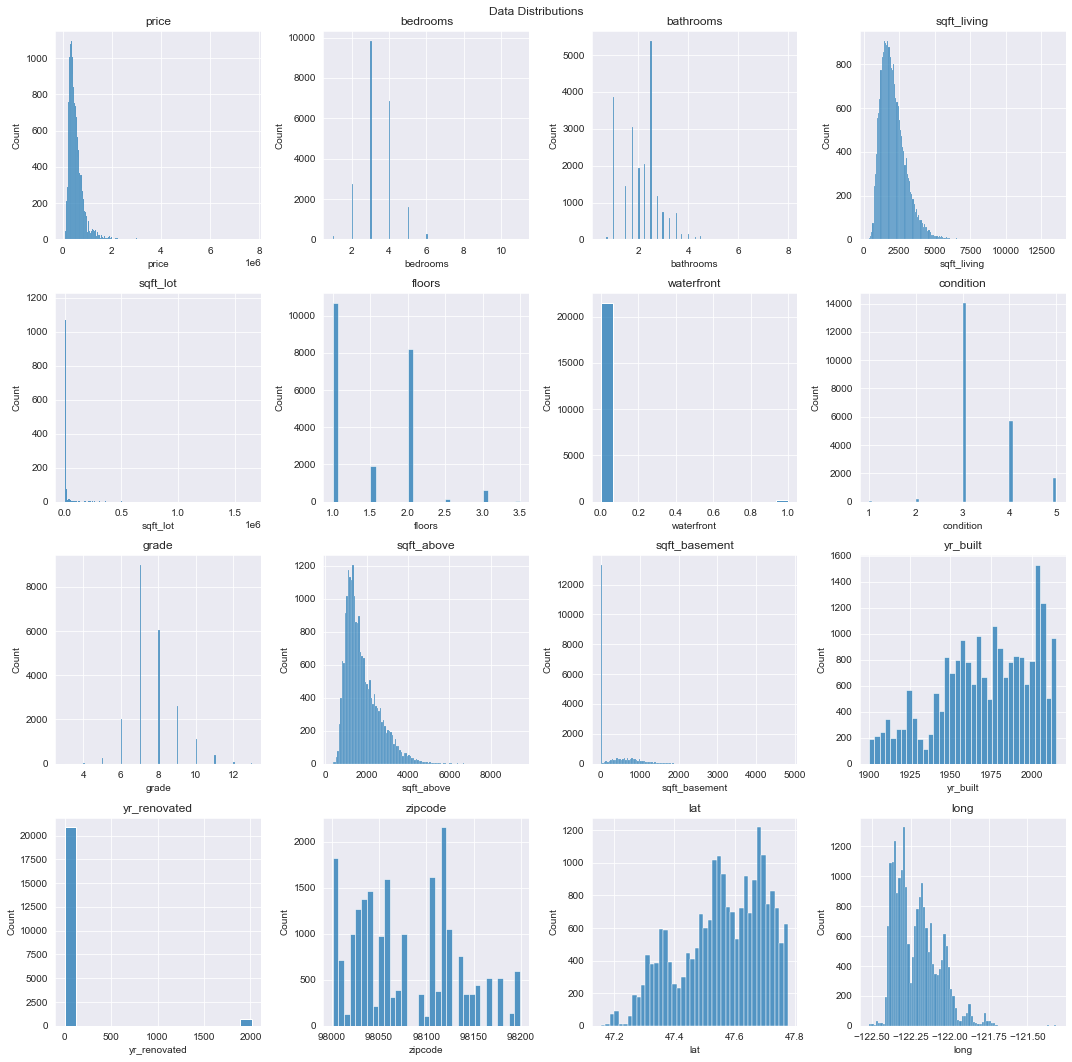

In [25]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    sns.histplot(df[col],ax=ax)
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

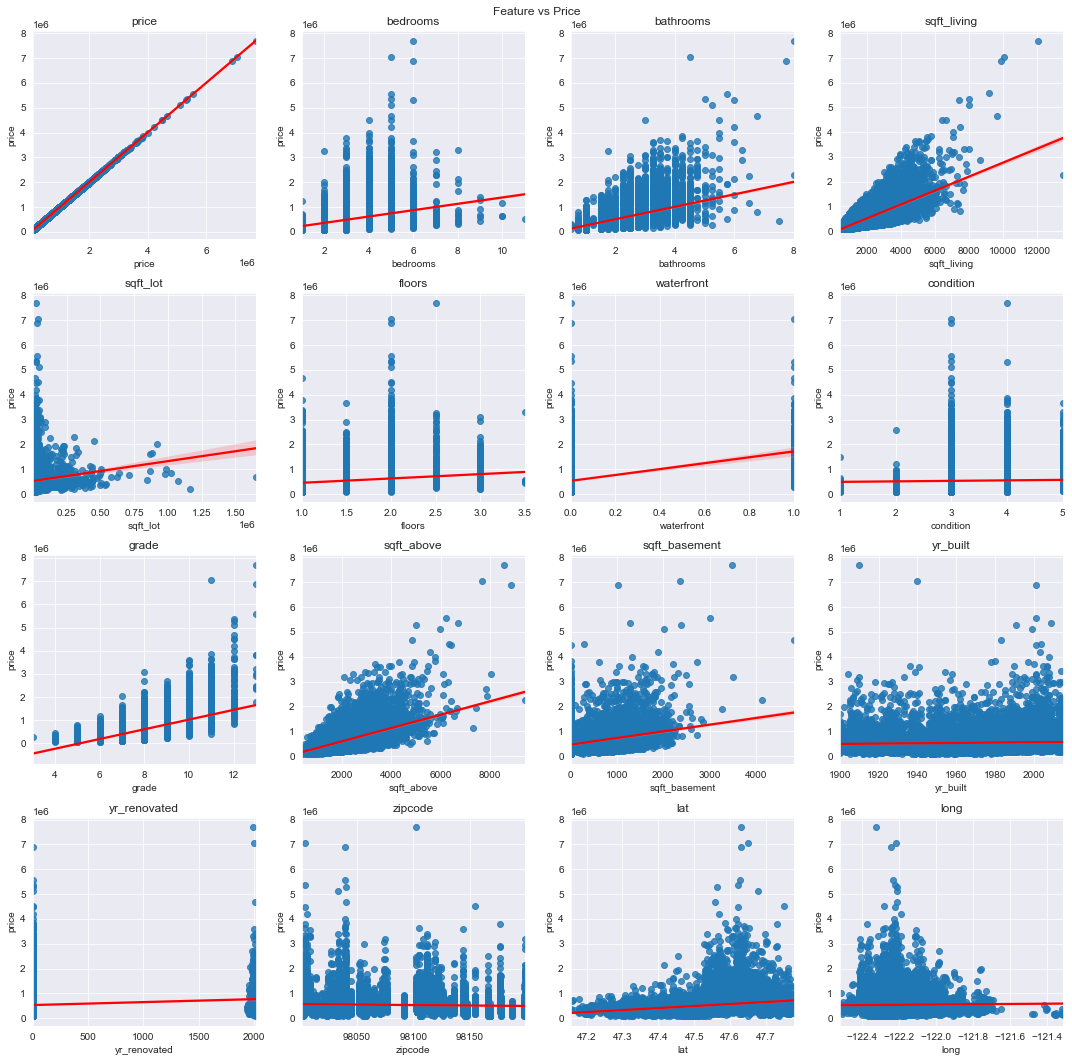

In [26]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    #sns.scatterplot(df[col], df['price'],ax=ax)
    sns.regplot(x=col, y='price', data=df, ax=ax, line_kws={'color':"red"})
    ax.set_title(col)
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

In [27]:
df.loc[:,['sqft_living','sqft_above','sqft_basement']]

sqft_living  sqft_above  sqft_basement
0             1180        1180            0.0
1             2570        2170          400.0
2              770         770            0.0
3             1960        1050          910.0
4             1680        1680            0.0
...            ...         ...            ...
21592         1530        1530            0.0
21593         2310        2310            0.0
21594         1020        1020            0.0
21595         1600        1600            0.0
21596         1020        1020            0.0

[21596 rows x 3 columns]

# Findings HERE

# Generating / Modifying Features

In [28]:
mod_df = df

## Price Per Square Foot (PSF) using sqft_above

In [29]:
mod_df['psf'] = mod_df['price'] / mod_df['sqft_above']

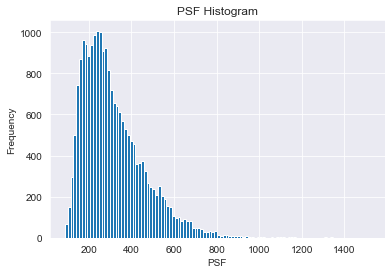

In [30]:
plt.hist(mod_df['psf'], bins='auto');
plt.title('PSF Histogram')
plt.xlabel('PSF')
plt.ylabel('Frequency');

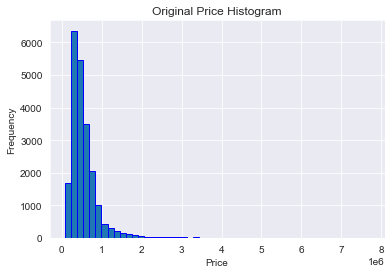

In [31]:
plt.hist(mod_df['price'], bins=50, ec = 'blue');
plt.title('Original Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency');

## Living to Lot Sqft Ratio

In [32]:
mod_df['livtolot'] = mod_df['sqft_living']/mod_df['sqft_lot']

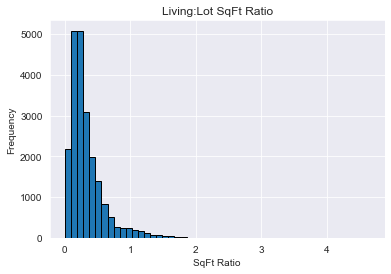

In [33]:
plt.hist(mod_df['livtolot'], bins=50, ec = 'black');
plt.title('Living:Lot SqFt Ratio')
plt.xlabel('SqFt Ratio')
plt.ylabel('Frequency');

## Basement to Categorical

In [34]:
mod_df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [35]:
mod_df['has_basement'] = mod_df['sqft_basement'] > 0

In [36]:
mod_df['has_basement']

0        False
1         True
2        False
3         True
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: has_basement, Length: 21596, dtype: bool

In [37]:
mod_df['has_basement'] = mod_df['has_basement'].astype(int)

In [38]:
mod_df['has_basement']

0        0
1        1
2        0
3        1
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: has_basement, Length: 21596, dtype: int32

## Renovation Year to Categorical

In [39]:
# Using 27 years as a cutoff between recent renovations

In [40]:
mod_df['rec_reno'] = (mod_df['yr_renovated'] > 1988).astype(int)

In [41]:
mod_df['rec_reno']

0        0
1        1
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: rec_reno, Length: 21596, dtype: int32

## Adding Geo Locations

In [42]:
# Added after initial modeling failed

In [43]:
def area_split(lat,long):
    #Outer Label
    if long > -121.647:
        return 2
    #North Label
    if lat > 47.5:
        return 0
    #South Label
    else:
        return 1

In [44]:
mod_df.apply(lambda x: area_split(x.lat,x.long), axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Length: 21596, dtype: int64

In [45]:
mod_df['location'] = mod_df.apply(lambda x: area_split(x.lat,x.long), axis=1)

In [46]:
mod_df.location.value_counts()

0    14976
1     6602
2       18
Name: location, dtype: int64

## Dropping features used in modification

In [47]:
add_drop_columns = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','yr_renovated']

In [48]:
mod_df = mod_df.drop(add_drop_columns,axis=1)

In [49]:
mod_df.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'zipcode', 'psf', 'livtolot', 'has_basement', 'rec_reno',
       'location'],
      dtype='object')

## Modified Data Visualization Checks

In [50]:
len(mod_df.columns)

13

IndexError: index 3 is out of bounds for axis 0 with size 3

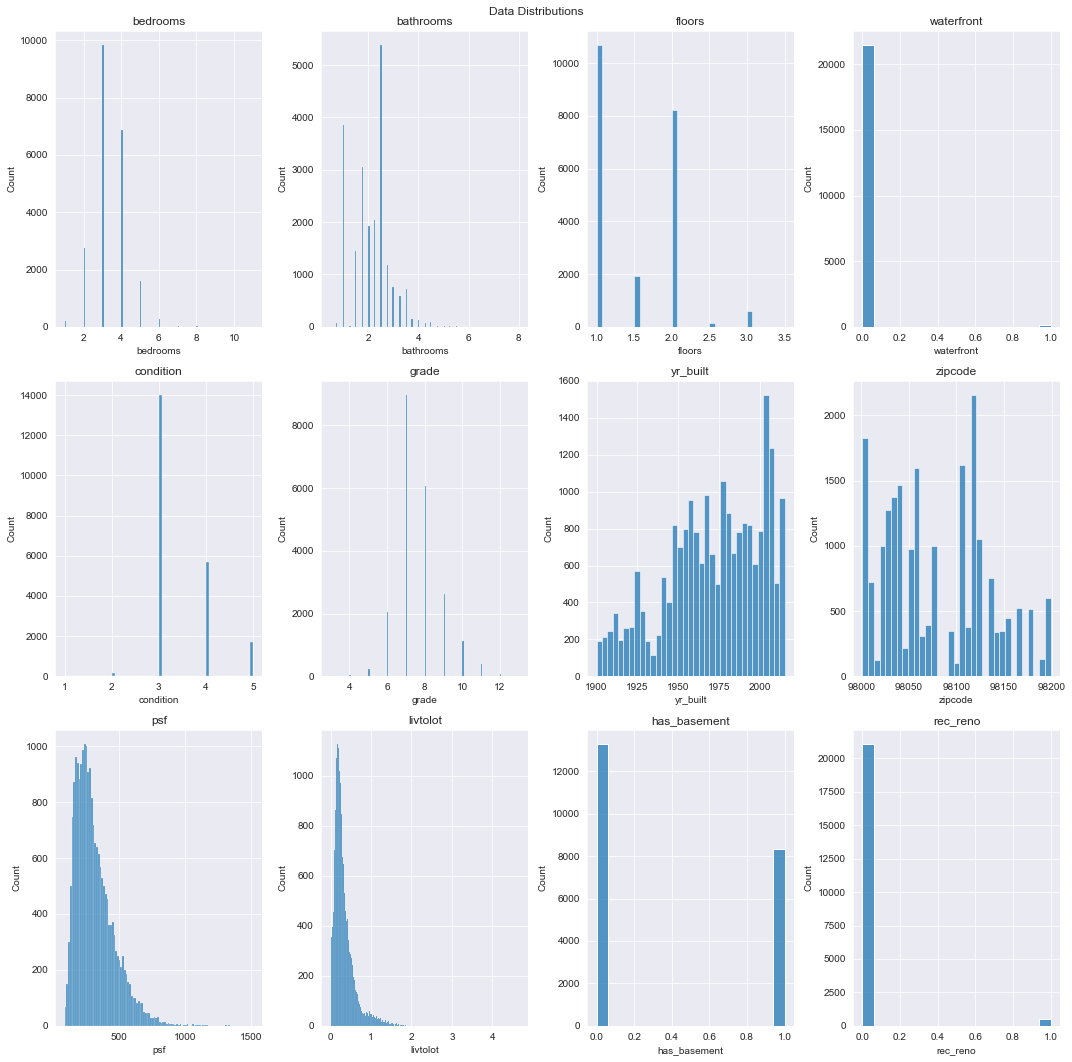

In [51]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=3)
for i in range(len(mod_df.columns)):
    col = mod_df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    sns.histplot(mod_df[col],ax=ax)
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

In [ ]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=3)
for i in range(len(mod_df.columns)):
    col = mod_df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    #sns.scatterplot(df[col], df['price'],ax=ax)
    sns.regplot(x=col, y='psf', data=mod_df, ax=ax, line_kws={'color':"red"})
    ax.set_title(col)
    fig.suptitle('Feature vs PSF')
    fig.tight_layout()

# Multicollinearity

In [52]:
mod_df.corr() > .75

bedrooms  bathrooms  floors  waterfront  condition  grade  \
bedrooms          True      False   False       False      False  False   
bathrooms        False       True   False       False      False  False   
floors           False      False    True       False      False  False   
waterfront       False      False   False        True      False  False   
condition        False      False   False       False       True  False   
grade            False      False   False       False      False   True   
yr_built         False      False   False       False      False  False   
zipcode          False      False   False       False      False  False   
psf              False      False   False       False      False  False   
livtolot         False      False   False       False      False  False   
has_basement     False      False   False       False      False  False   
rec_reno         False      False   False       False      False  False   
location         False      False   False       False      False  False   

              yr_built  zipcode    psf  livtolot  has_basement  rec_reno  \
bedrooms         False    False  False     False         False     False   
bathrooms        False    False  False     False         False     False   
floors           False    False  False     False         False     False   
waterfront       False    False  False     False         False     False   
condition        False    False  False     False         False     False   
grade            False    False  False     False         False     False   
yr_built          True    False  False     False         False     False   
zipcode          False     True  False     False         False     False   
psf              False    False   True     False         False     False   
livtolot         False    False  False      True         False     False   
has_basement     False    False  False     False          True     False   
rec_reno         False    False  False     False         False      True   
location         False    False  False     False         False     False   

              location  
bedrooms         False  
bathrooms        False  
floors           False  
waterfront       False  
condition        False  
grade            False  
yr_built         False  
zipcode          False  
psf              False  
livtolot         False  
has_basement     False  
rec_reno         False  
location          True

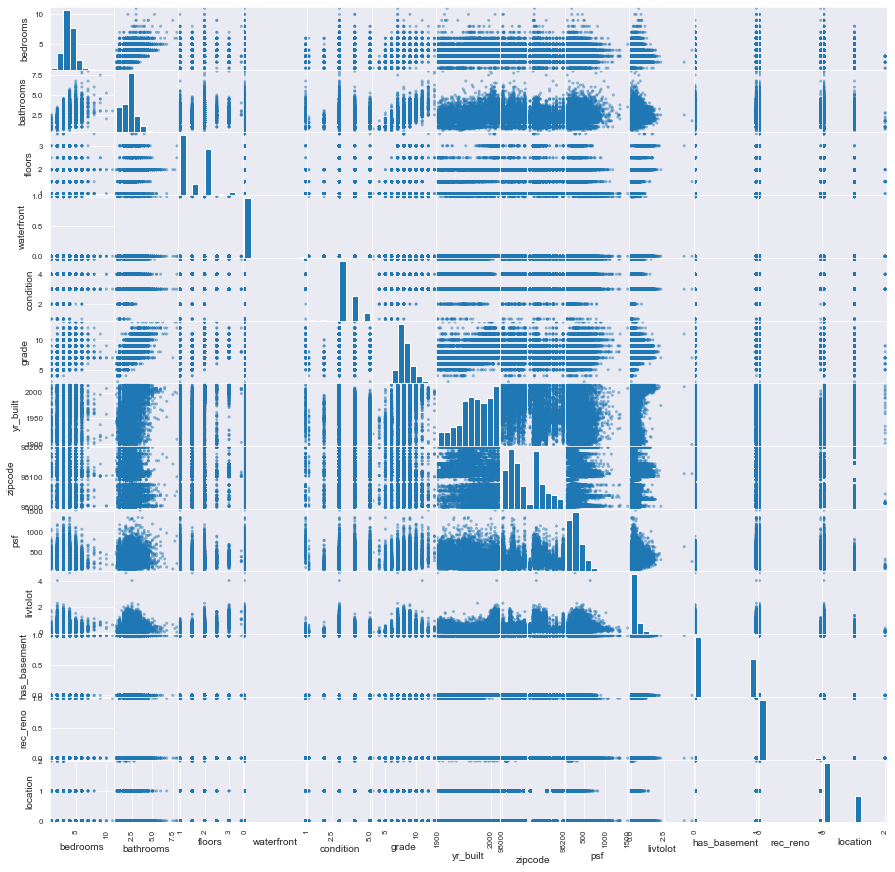

In [53]:
pd.plotting.scatter_matrix(mod_df, figsize = [15,15]);

In [54]:
mod_df.corr()

bedrooms  bathrooms    floors  waterfront  condition     grade  \
bedrooms      1.000000   0.527870  0.183707   -0.002054   0.023440  0.366174   
bathrooms     0.527870   1.000000  0.502574    0.063628  -0.126443  0.665834   
floors        0.183707   0.502574  1.000000    0.020794  -0.264013  0.458783   
waterfront   -0.002054   0.063628  0.020794    1.000000   0.016659  0.082817   
condition     0.023440  -0.126443 -0.264013    0.016659   1.000000 -0.146854   
grade         0.366174   0.665834  0.458783    0.082817  -0.146854  1.000000   
yr_built      0.160736   0.507166  0.489175   -0.024491  -0.361555  0.447854   
zipcode      -0.158588  -0.204778 -0.059522    0.028925   0.002835 -0.185761   
psf          -0.080011  -0.001580 -0.157565    0.200274   0.195401  0.122061   
livtolot      0.027760   0.287012  0.556703   -0.029807  -0.156500  0.191394   
has_basement  0.160391   0.159897 -0.252426    0.039227   0.130422  0.050736   
rec_reno      0.031587   0.068413  0.007508    0.048177  -0.072401  0.037696   
location     -0.001680  -0.069740 -0.095481    0.006251   0.008463 -0.173778   

              yr_built   zipcode       psf  livtolot  has_basement  rec_reno  \
bedrooms      0.160736 -0.158588 -0.080011  0.027760      0.160391  0.031587   
bathrooms     0.507166 -0.204778 -0.001580  0.287012      0.159897  0.068413   
floors        0.489175 -0.059522 -0.157565  0.556703     -0.252426  0.007508   
waterfront   -0.024491  0.028925  0.200274 -0.029807      0.039227  0.048177   
condition    -0.361555  0.002835  0.195401 -0.156500      0.130422 -0.072401   
grade         0.447854 -0.185761  0.122061  0.191394      0.050736  0.037696   
yr_built      1.000000 -0.347199 -0.343812  0.279050     -0.163953 -0.155532   
zipcode      -0.347199  1.000000  0.208942  0.177526      0.159578  0.051733   
psf          -0.343812  0.208942  1.000000  0.141128      0.438295  0.120508   
livtolot      0.279050  0.177526  0.141128  1.000000      0.152112  0.012980   
has_basement -0.163953  0.159578  0.438295  0.152112      1.000000  0.049453   
rec_reno     -0.155532  0.051733  0.120508  0.012980      0.049453  1.000000   
location      0.147446 -0.195982 -0.523555 -0.249754     -0.163134 -0.038726   

              location  
bedrooms     -0.001680  
bathrooms    -0.069740  
floors       -0.095481  
waterfront    0.006251  
condition     0.008463  
grade        -0.173778  
yr_built      0.147446  
zipcode      -0.195982  
psf          -0.523555  
livtolot     -0.249754  
has_basement -0.163134  
rec_reno     -0.038726  
location      1.000000

## Multicollinearity Findings

In [55]:
# Need to keep an eye on the relationship between Bathrooms, Bedrooms, Floors, and Grade.
# It makes sense that the more floors a home has, the more bathrooms.
# Also, the more bedrooms, the more bathrooms are needed.

# Initial Regression Modeling

In [56]:
mod_df.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'zipcode', 'psf', 'livtolot', 'has_basement', 'rec_reno',
       'location'],
      dtype='object')

In [57]:
mod_categorical = ['waterfront','has_basement','rec_reno']

In [58]:
y = mod_df[['psf']]
X = mod_df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'livtolot', 'has_basement', 'rec_reno']]

In [59]:

linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(X_train, y_train))
print("Test R2: ", linreg.score(X_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.42876238768972874
Test R2:  0.4223736680393462
Train RMSE:  112.05382028329399
Test RMSE:  109.46058120683863


In [149]:
def model(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
    return model

In [133]:
model(X_train, X_test, y_train, y_test)

Train R2:  0.7138204341492557
Test R2:  0.7326170907799092
Train RMSE:  78.59772780271975
Test RMSE:  77.30054681922806


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     536.1
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:49:48   Log-Likelihood:                -99912.
No. Observations:               17276   AIC:                         2.000e+05
Df Residuals:                   17195   BIC:                         2.006e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.5194      0.154    -22.907      0.000      -3.821      -3.218
bedrooms       -20.1687      0.824    -24.483      0.000     -21.783     -18.554
bathrooms       -0.5813      1.333     -0.436      0.663      -3.195       2.032
floors         -42.7165      1.833    -23.302      0.000     -46.310     -39.123
waterfront     326.7033      8.153     40.074      0.000     310.723     342.683
condition       19.9458      1.048     19.028      0.000      17.891      22.000
grade           12.7642      0.786     16.234      0.000      11.223      14.305
yr_built         0.0209      0.036      0.582      0.561      -0.049       0.091
zipcode          0.0009      0.001      1.276      0.202      -0.000       0.002
livtolot       -36.5778      3.642    -10.042      0.000     -43.717     -29.438
has_basement    74.2488      1.551     47.861      0.000      71.208      77.290
rec_reno        35.1354      4.027      8.724      0.000      27.241      43.029
location       -34.2314      3.874     -8.836      0.000     -41.825     -26.638
zone            36.3421      1.735     20.951      0.000      32.942      39.742
zip_98002       -6.1894      7.613     -0.813      0.416     -21.112       8.733
zip_98003       -3.5663      7.057     -0.505      0.613     -17.400      10.267
zip_98004      232.1790      5.057     45.915      0.000     222.267     242.091
zip_98005       45.9209      6.895      6.660      0.000      32.406      59.435
zip_98006       36.0616      4.265      8.455      0.000      27.701      44.422
zip_98007       18.2256      7.557      2.412      0.016       3.413      33.038
zip_98008       26.4825      5.420      4.886      0.000      15.859      37.106
zip_98010      -88.8631      9.419     -9.435      0.000    -107.325     -70.402
zip_98011      -50.7888      6.550     -7.754      0.000     -63.627     -37.951
zip_98014     -141.5994      8.346    -16.965      0.000    -157.959    -125.239
zip_98019     -147.5809      6.891    -21.416      0.000    -161.088    -134.074
zip_98022     -134.7611      6.983    -19.300      0.000    -148.448    -121.074
zip_98023      -14.4244      6.063     -2.379      0.017     -26.308      -2.541
zip_98024     -123.0633      9.455    -13.015      0.000    -141.597    -104.530
zip_98027      -18.3940      4.397     -4.183      0.000     -27.013      -9.775
zip_98028      -53.9697      5.342    -10.103      0.000     -64.440     -43.499
zip_98029        2.0471      5.117      0.400      0.689      -7.982      12.076
zip_98030        9.8406      7.197      1.367      0.172      -4.267      23.948
zip_98031       10.9623      7.178      1.527      0.127      -3.107      25.032
zip_98032       -7.6917      9.226     -0.834      0.404     -25.776      10.393
zip_98033       75.8231      4.367     17.363      0.000      67.263      84.383
zip_9

In [62]:

formula = 'psf ~ bedrooms+bathrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)'
model = ols(formula=formula, data=mod_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     1614.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:44:39   Log-Likelihood:            -1.3245e+05
No. Observations:               21596   AIC:                         2.649e+05
Df Residuals:                   21585   BIC:                         2.650e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3873.8488     69.471     55.762      0.000    3737.680    4010.018
C(waterfront)[T.1.0]   279.5992      9.361     29.869      0.000     261.251     297.947
C(has_basement)[T.1]    89.5209      1.913     46.800      0.000      85.772      93.270
C(rec_reno)[T.1]        30.3769      5.056      6.008      0.000      20.466      40.288
bedrooms               -29.9355      1.016    -29.461      0.000     -31.927     -27.944
bathrooms                1.3900      1.672      0.832      0.406      -1.886       4.666
floors                 -38.6242      2.269    -17.020      0.000     -43.072     -34.176
condition               16.3721      1.284     12.755      0.000      13.856      18.888
grade                   45.4981      0.901     50.488      0.000      43.732      47.264
yr_built                -1.9717      0.035    -55.764      0.000      -2.041      -1.902
livtolot               128.3763      3.773     34.027      0.000     120.981     135.771
==============================================================================
Omnibus:                     4619.453   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16156.665
Skew:                           1.059   Prob(JB):                         0.00
Kurtosis:                       6.670   Cond. No.                     1.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Dropping Bathroom

In [63]:
mod2_df = mod_df.drop('bathrooms',axis=1)

In [64]:
formula = 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)'
model = ols(formula=formula, data=mod2_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     1793.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:44:40   Log-Likelihood:            -1.3245e+05
No. Observations:               21596   AIC:                         2.649e+05
Df Residuals:                   21586   BIC:                         2.650e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3853.2703     64.914     59.360      0.000    3726.035    3980.506
C(waterfront)[T.1.0]   279.9403      9.352     29.934      0.000     261.610     298.270
C(has_basement)[T.1]    89.9371      1.846     48.714      0.000      86.318      93.556
C(rec_reno)[T.1]        30.9197      5.014      6.167      0.000      21.092      40.748
bedrooms               -29.5950      0.930    -31.825      0.000     -31.418     -27.772
floors                 -38.1580      2.199    -17.353      0.000     -42.468     -33.848
condition               16.4572      1.279     12.862      0.000      13.949      18.965
grade                   45.7977      0.826     55.446      0.000      44.179      47.417
yr_built                -1.9621      0.033    -58.713      0.000      -2.028      -1.897
livtolot               128.3382      3.772     34.020      0.000     120.944     135.733
==============================================================================
Omnibus:                     4623.296   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16177.847
Skew:                           1.060   Prob(JB):                         0.00
Kurtosis:                       6.673   Cond. No.                     1.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Findings

# Considering other features: Geography

In [65]:
import matplotlib.image as mpimg

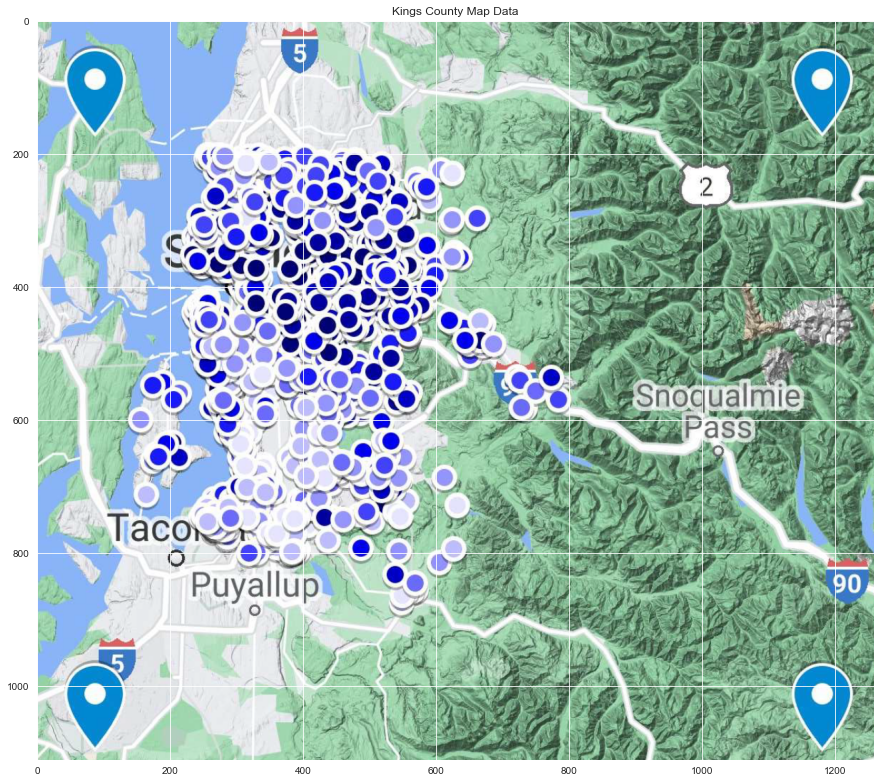

In [66]:
fig, ax = plt.subplots(figsize=(15,15))
img = mpimg.imread('data/map.png')
imgplot = plt.imshow(img)
plt.title('Kings County Map Data');

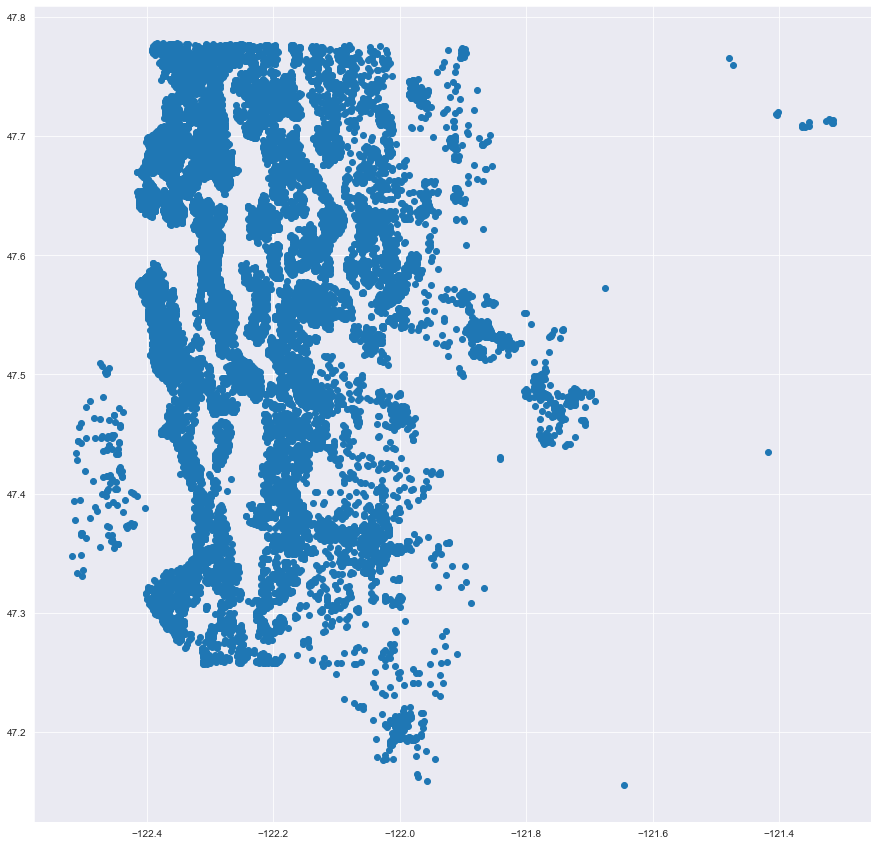

In [67]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(df.long,df.lat);

## Geographical findings

In [68]:
## North appears to have more expensive homes.
## There are several homes in the outskirts, such as the mountains, or separate isolated towns
## There are also two islands, Vashon and Mercer Island

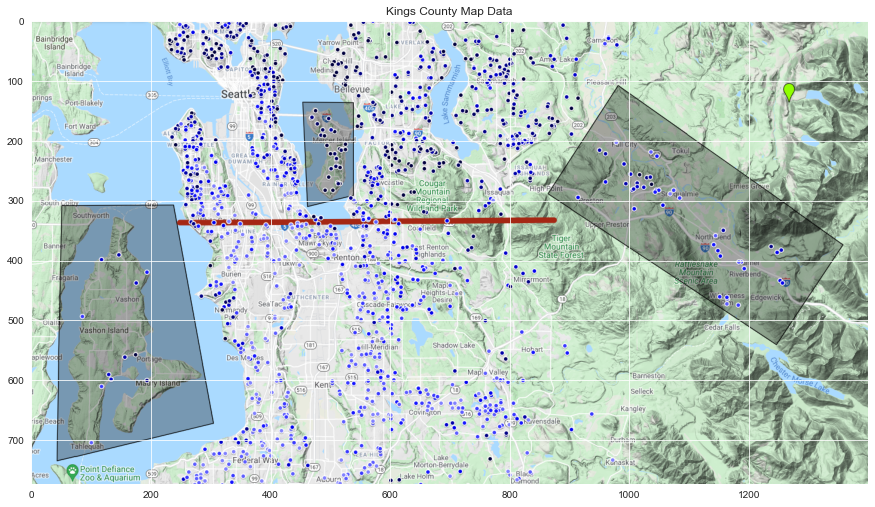

In [69]:
fig, ax = plt.subplots(figsize=(15,15))
img = mpimg.imread('data/map_areas.png')
imgplot = plt.imshow(img)
plt.title('Kings County Map Data');

In [70]:
df.loc[(df.lat <47.2) & (df.long > -121.8)].long

3292   -121.646
Name: long, dtype: float64

In [71]:
# Want to get longitudes greater than -121.647

In [72]:
#keeping it simple, dividing by north, south, and outer Kings County
# North = 0
# South = 1
# Outer = 2
def area_split(lat,long):
    #Outer Label
    if long > -121.647:
        return 2
    if lat > 47.5:
        return 0
    else:
        return 1
    

In [73]:
#test
print(area_split(df.lat[0],df.long[0]))
df.iloc[0]

0


price            221900.000000
bedrooms              3.000000
bathrooms             1.000000
sqft_living        1180.000000
sqft_lot           5650.000000
floors                1.000000
waterfront            0.000000
condition             3.000000
grade                 7.000000
sqft_above         1180.000000
sqft_basement         0.000000
yr_built           1955.000000
yr_renovated          0.000000
zipcode           98178.000000
lat                  47.511200
long               -122.257000
psf                 188.050847
livtolot              0.208850
has_basement          0.000000
rec_reno              0.000000
location              0.000000
Name: 0, dtype: float64

In [74]:
print(area_split(df.lat[3292],df.long[3292]))
df.iloc[3292]

2


price            380000.000000
bedrooms              3.000000
bathrooms             2.250000
sqft_living        1860.000000
sqft_lot          15559.000000
floors                2.000000
waterfront            0.000000
condition             4.000000
grade                 7.000000
sqft_above         1860.000000
sqft_basement         0.000000
yr_built           1963.000000
yr_renovated          0.000000
zipcode           98022.000000
lat                  47.155900
long               -121.646000
psf                 204.301075
livtolot              0.119545
has_basement          0.000000
rec_reno              0.000000
location              2.000000
Name: 3292, dtype: float64

In [75]:
formula = 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)+C(location)'
model = ols(formula=formula, data=mod_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     2362.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:44:41   Log-Likelihood:            -1.2995e+05
No. Observations:               21596   AIC:                         2.599e+05
Df Residuals:                   21584   BIC:                         2.600e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2605.1511     60.155     43.308      0.000    2487.244    2723.059
C(waterfront)[T.1.0]   301.8404      8.334     36.220      0.000     285.506     318.175
C(has_basement)[T.1]    82.3077      1.647     49.962      0.000      79.079      85.537
C(rec_reno)[T.1]        44.2116      4.469      9.893      0.000      35.452      52.971
C(location)[T.1]      -121.9649      1.626    -75.018      0.000    -125.152    -118.778
C(location)[T.2]      -114.7953     23.473     -4.891      0.000    -160.804     -68.787
bedrooms               -25.4478      0.830    -30.648      0.000     -27.075     -23.820
floors                 -37.6723      1.959    -19.229      0.000     -41.512     -33.832
condition               21.9856      1.142     19.255      0.000      19.748      24.224
grade                   31.3317      0.761     41.196      0.000      29.841      32.822
yr_built                -1.2599      0.031    -40.384      0.000      -1.321      -1.199
livtolot                70.1122      3.449     20.327      0.000      63.351      76.873
==============================================================================
Omnibus:                     6178.295   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30264.783
Skew:                           1.305   Prob(JB):                         0.00
Kurtosis:                       8.179   Cond. No.                     1.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
df.zipcode

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21596, dtype: int64

In [77]:
np.sort(df.zipcode.unique())

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199], dtype=int64)

In [78]:
z1 = [98001,98002,98003,98023,98030,98031,98032,98055,98146,98148,98166,98168,98178,98188,98198,] #the south

In [79]:
z2 = [98107,98117,98103,98115,98105,98133,98125,98177,98155, ] 

In [80]:
z3 = [98102,98106,98108,98109,98112,98113,98114,98116,98118,98119,98122,98126,98144,98136,98199]

In [81]:
z4 = [98004,98005,98006,98007,98008,98011,98027,98028,98029,98033,98034,98039, 98040,98056,98059,98052,98053,98077,98072,98074,98075,98070]

In [82]:
z5 = [98010,98022,98092,98042,98038,98058]

In [83]:
z6 = [98045, 98065, 98024, 98014,98019]

In [84]:
df['zone'] = df['zipcode']

In [85]:
def zoner(zc):
    if zc in z1:
        return 1
    if zc in z2:
        return 2
    if zc in z3:
        return 3
    if zc in z4:
        return 4
    if zc in z5:
        return 5
    if zc in z6:
        return 6

In [86]:
df['zone'] = df['zipcode'].apply(zoner)

In [87]:
df['zone']

0        1
1        2
2        4
3        3
4        4
        ..
21592    2
21593    1
21594    3
21595    4
21596    3
Name: zone, Length: 21596, dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

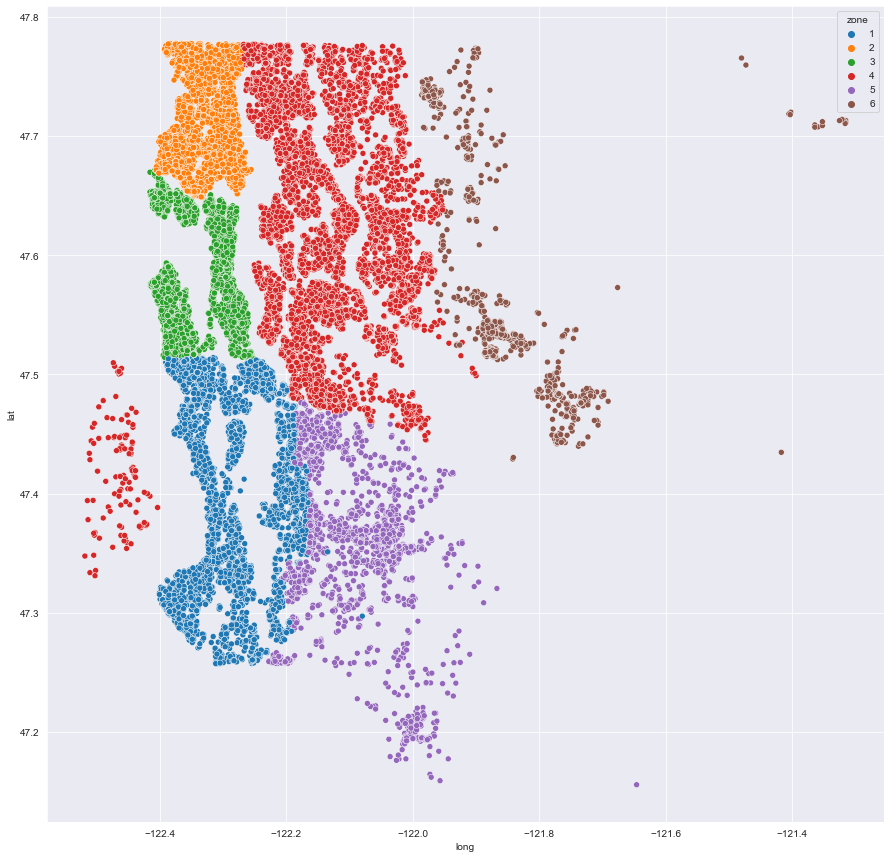

In [88]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(x=df.long,y=df.lat, hue=df.zone, palette='tab10')

In [89]:
df.loc[(df.long >-122.2) & (df.zone ==2)]

Empty DataFrame
Columns: [price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, psf, livtolot, has_basement, rec_reno, location, zone]
Index: []

[0 rows x 22 columns]

In [90]:
mod_df['zone'] = mod_df.zipcode.apply(zoner)

In [91]:
formula = 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)+C(location)+C(zone)'
model = ols(formula=formula, data=mod_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     1766.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:44:43   Log-Likelihood:            -1.2944e+05
No. Observations:               21596   AIC:                         2.589e+05
Df Residuals:                   21579   BIC:                         2.591e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2097.5172     68.045     30.826      0.000    1964.145    2230.890
C(waterfront)[T.1.0]   306.3328      8.152     37.578      0.000     290.355     322.311
C(has_basement)[T.1]    79.8481      1.625     49.151      0.000      76.664      83.032
C(rec_reno)[T.1]        45.0434      4.373     10.301      0.000      36.472      53.614
C(location)[T.1]       -59.7913      2.956    -20.226      0.000     -65.586     -53.997
C(location)[T.2]       -66.4418     23.115     -2.874      0.004    -111.749     -21.135
C(zone)[T.2]           103.4136      3.536     29.246      0.000      96.483     110.344
C(zone)[T.3]           102.8296      3.634     28.293      0.000      95.706     109.953
C(zone)[T.4]            75.1312      3.129     24.015      0.000      68.999      81.263
C(zone)[T.5]            22.5068      2.644      8.513      0.000      17.324      27.689
C(zone)[T.6]            31.1116      4.173      7.456      0.000      22.932      39.291
bedrooms               -23.5069      0.820    -28.657      0.000     -25.115     -21.899
floors                 -40.1174      1.928    -20.804      0.000     -43.897     -36.338
condition               20.3638      1.129     18.031      0.000      18.150      22.578
grade                   30.3301      0.752     40.329      0.000      28.856      31.804
yr_built                -1.0351      0.035    -29.640      0.000      -1.104      -0.967
livtolot                47.4519      3.673     12.920      0.000      40.253      54.651
==============================================================================
Omnibus:                     6600.150   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37049.967
Skew:                           1.358   Prob(JB):                         0.00
Kurtosis:                       8.814   Cond. No.                     2.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
formula = 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)+C(location)+C(zone)'
model = ols(formula=formula, data=mod_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     1766.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:44:43   Log-Likelihood:            -1.2944e+05
No. Observations:               21596   AIC:                         2.589e+05
Df Residuals:                   21579   BIC:                         2.591e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2097.5172     68.045     30.826      0.000    1964.145    2230.890
C(waterfront)[T.1.0]   306.3328      8.152     37.578      0.000     290.355     322.311
C(has_basement)[T.1]    79.8481      1.625     49.151      0.000      76.664      83.032
C(rec_reno)[T.1]        45.0434      4.373     10.301      0.000      36.472      53.614
C(location)[T.1]       -59.7913      2.956    -20.226      0.000     -65.586     -53.997
C(location)[T.2]       -66.4418     23.115     -2.874      0.004    -111.749     -21.135
C(zone)[T.2]           103.4136      3.536     29.246      0.000      96.483     110.344
C(zone)[T.3]           102.8296      3.634     28.293      0.000      95.706     109.953
C(zone)[T.4]            75.1312      3.129     24.015      0.000      68.999      81.263
C(zone)[T.5]            22.5068      2.644      8.513      0.000      17.324      27.689
C(zone)[T.6]            31.1116      4.173      7.456      0.000      22.932      39.291
bedrooms               -23.5069      0.820    -28.657      0.000     -25.115     -21.899
floors                 -40.1174      1.928    -20.804      0.000     -43.897     -36.338
condition               20.3638      1.129     18.031      0.000      18.150      22.578
grade                   30.3301      0.752     40.329      0.000      28.856      31.804
yr_built                -1.0351      0.035    -29.640      0.000      -1.104      -0.967
livtolot                47.4519      3.673     12.920      0.000      40.253      54.651
==============================================================================
Omnibus:                     6600.150   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37049.967
Skew:                           1.358   Prob(JB):                         0.00
Kurtosis:                       8.814   Cond. No.                     2.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
formula = 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)+C(zipcode)'
model = ols(formula=formula, data=mod_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     698.0
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:08:57   Log-Likelihood:            -1.2486e+05
No. Observations:               21596   AIC:                         2.499e+05
Df Residuals:                   21517   BIC:                         2.505e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              108.8133     61.062      1.782      0.075     -10.874     228.500
C(waterfront)[T.1.0]   330.4202      6.720     49.173      0.000     317.249     343.591
C(has_basement)[T.1]    74.0731      1.333     55.553      0.000      71.460      76.687
C(rec_reno)[T.1]        40.0663      3.558     11.260      0.000      33.092      47.041
C(zipcode)[T.98002]     -6.0359      6.964     -0.867      0.386     -19.685       7.613
C(zipcode)[T.98003]     -4.4010      6.268     -0.702      0.483     -16.687       7.885
C(zipcode)[T.98004]    376.2533      6.139     61.290      0.000     364.221     388.286
C(zipcode)[T.98005]    182.2546      7.405     24.613      0.000     167.741     196.769
C(zipcode)[T.98006]    178.1390      5.525     32.244      0.000     167.310     188.968
C(zipcode)[T.98007]    158.8295      7.835     20.272      0.000     143.472     174.187
C(zipcode)[T.98008]    169.1124      6.284     26.910      0.000     156.795     181.430
C(zipcode)[T.98010]     53.4408      8.895      6.008      0.000      36.006      70.876
C(zipcode)[T.98011]     89.5908      6.996     12.807      0.000      75.879     103.303
C(zipcode)[T.98014]     67.7389      8.202      8.259      0.000      51.663      83.815
C(zipcode)[T.98019]     66.5656      7.059      9.429      0.000      52.729      80.402
C(zipcode)[T.98022]     11.0860      6.620      1.675      0.094      -1.890      24.062
C(zipcode)[T.98023]    -15.1944      5.441     -2.793      0.005     -25.858      -4.531
C(zipcode)[T.98024]     93.7289      9.727      9.635      0.000      74.662     112.796
C(zipcode)[T.98027]    115.0289      5.711     20.142      0.000     103.835     126.223
C(zipcode)[T.98028]     89.0085      6.251     14.239      0.000      76.756     101.261
C(zipcode)[T.98029]    144.4223      6.089     23.719      0.000     132.488     156.357
C(zipcode)[T.98030]      7.9657      6.425      1.240      0.215      -4.627      20.559
C(zipcode)[T.98031]     11.4192      6.308      1.810      0.070      -0.945      23.784
C(zipcode)[T.98032]    -11.1162      8.171     -1.360      0.174     -27.131       4.899
C(zipcode)[T.98033]    217.8797      5.636     38.659      0.000     206.833     228.927
C(zipcode)[T.98034]    126.3715      5.348     23.630      0.000     115.889     136.854
C(zipcode)[T.98038]     39.8042      5.269      7.554      0.000      29.476      50.132
C(zipcode)[T.98039]    467.4394     11.953     39.105      0.000     444.010     490.869
C(zipcode)[T.98040]    276.2132      6.363     43.411      0.000     263.742     288.685
C(zipcode)[T.98042]     10.5513      5.338      1.977      0.048       0.088      21.014
C(zipcode)[T.98045]     65.1918      6.736      9.678      0.000      51.989      78.395
C(zipcode)[T.98052]    148.4319      5.308     27.966    

In [100]:
y = mod_df[['psf']]
X = mod_df[['bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'livtolot', 'has_basement', 'rec_reno','zipcode' ]]

# 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)+C(zipcode)'

In [101]:
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(X_train, y_train))
print("Test R2: ", linreg.score(X_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.4270828410496661
Test R2:  0.4304015060515659
Train RMSE:  111.65546111707171
Test RMSE:  111.02070432427972


In [111]:
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X[['zipcode']])
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(X_train, y_train))
print("Test R2: ", linreg.score(X_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.42875222199354945
Test R2:  0.42383489685217823
Train RMSE:  111.66121802423162
Test RMSE:  110.99830303609109


In [ ]:
#convert to dummy variables
#highp
#check assumptions

<AxesSubplot:xlabel='long', ylabel='lat'>

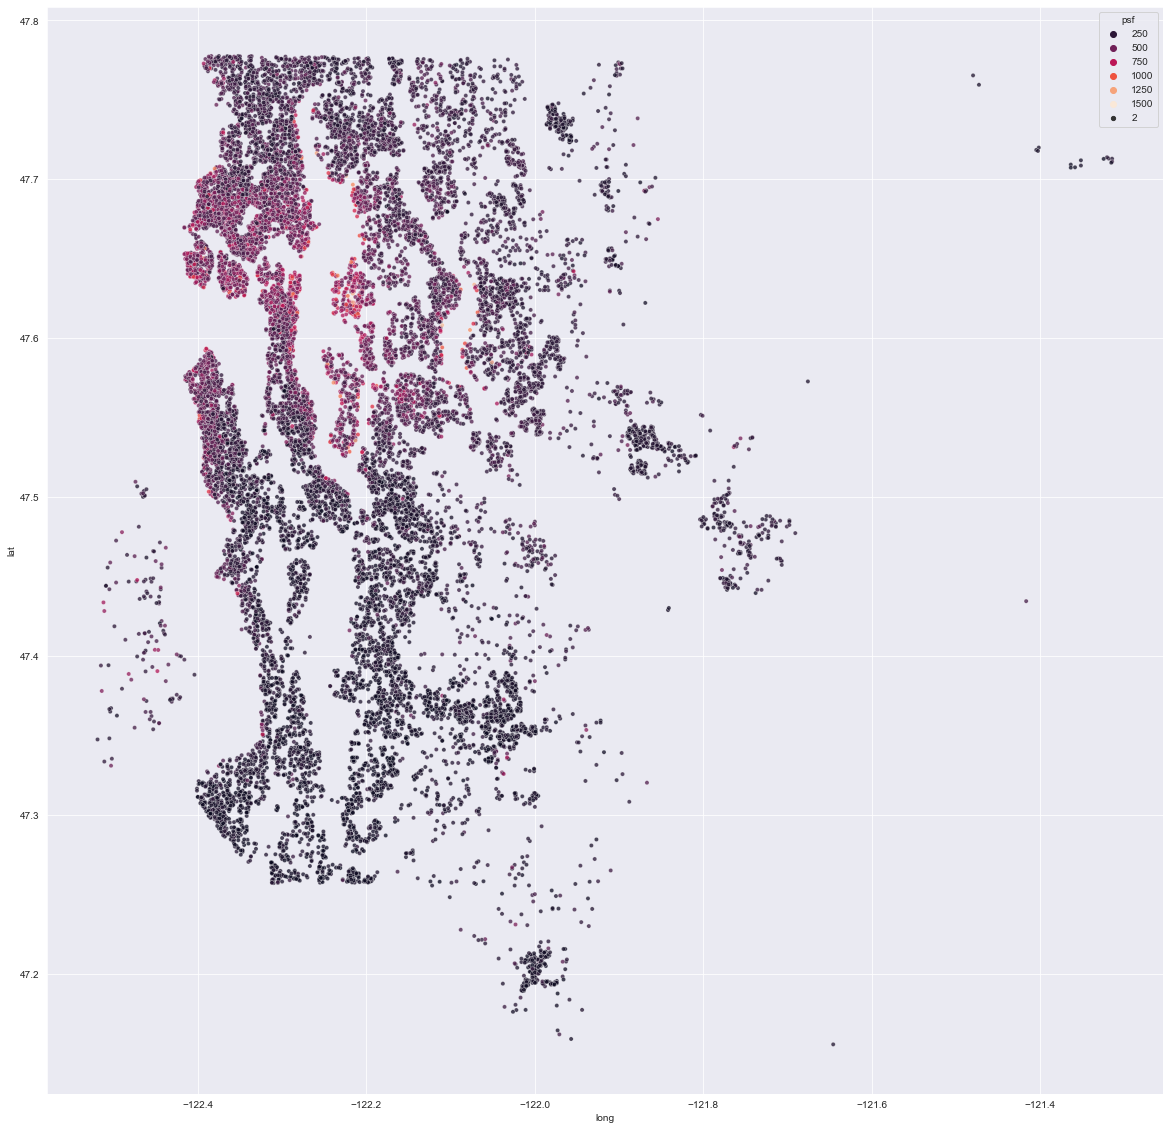

In [123]:
fig, ax = plt.subplots(figsize=(20,20))
sns.scatterplot(x=df.long,y=df.lat, hue=df.psf, palette='rocket', alpha=.75, size =2)

In [124]:
dummy_zips = pd.get_dummies(mod_df['zipcode'], prefix='zip', drop_first=True)

In [125]:
preprocessed = pd.concat([mod_df, dummy_zips], axis=1)

In [ ]:
x_p = preprocessed.drop('psf', axis=1)
y_p = preprocessed['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model = model(X_train, X_test, y_train, y_test)

In [126]:
x_p = preprocessed.drop('psf', axis=1)

In [127]:
y_p = preprocessed['psf']

In [130]:
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(X_train, y_train))
print("Test R2: ", linreg.score(X_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.7138204341492557
Test R2:  0.7326170907799092
Train RMSE:  78.59772780271975
Test RMSE:  77.30054681922806


In [151]:
prepped_model = model(X_train, X_test, y_train, y_test)

Train R2:  0.7138204341492557
Test R2:  0.7326170907799092
Train RMSE:  78.59772780271975
Test RMSE:  77.30054681922806


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     536.1
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:08:10   Log-Likelihood:                -99912.
No. Observations:               17276   AIC:                         2.000e+05
Df Residuals:                   17195   BIC:                         2.006e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.5194      0.154    -22.907      0.000      -3.821      -3.218
bedrooms       -20.1687      0.824    -24.483      0.000     -21.783     -18.554
bathrooms       -0.5813      1.333     -0.436      0.663      -3.195       2.032
floors         -42.7165      1.833    -23.302      0.000     -46.310     -39.123
waterfront     326.7033      8.153     40.074      0.000     310.723     342.683
condition       19.9458      1.048     19.028      0.000      17.891      22.000
grade           12.7642      0.786     16.234      0.000      11.223      14.305
yr_built         0.0209      0.036      0.582      0.561      -0.049       0.091
zipcode          0.0009      0.001      1.276      0.202      -0.000       0.002
livtolot       -36.5778      3.642    -10.042      0.000     -43.717     -29.438
has_basement    74.2488      1.551     47.861      0.000      71.208      77.290
rec_reno        35.1354      4.027      8.724      0.000      27.241      43.029
location       -34.2314      3.874     -8.836      0.000     -41.825     -26.638
zone            36.3421      1.735     20.951      0.000      32.942      39.742
zip_98002       -6.1894      7.613     -0.813      0.416     -21.112       8.733
zip_98003       -3.5663      7.057     -0.505      0.613     -17.400      10.267
zip_98004      232.1790      5.057     45.915      0.000     222.267     242.091
zip_98005       45.9209      6.895      6.660      0.000      32.406      59.435
zip_98006       36.0616      4.265      8.455      0.000      27.701      44.422
zip_98007       18.2256      7.557      2.412      0.016       3.413      33.038
zip_98008       26.4825      5.420      4.886      0.000      15.859      37.106
zip_98010      -88.8631      9.419     -9.435      0.000    -107.325     -70.402
zip_98011      -50.7888      6.550     -7.754      0.000     -63.627     -37.951
zip_98014     -141.5994      8.346    -16.965      0.000    -157.959    -125.239
zip_98019     -147.5809      6.891    -21.416      0.000    -161.088    -134.074
zip_98022     -134.7611      6.983    -19.300      0.000    -148.448    -121.074
zip_98023      -14.4244      6.063     -2.379      0.017     -26.308      -2.541
zip_98024     -123.0633      9.455    -13.015      0.000    -141.597    -104.530
zip_98027      -18.3940      4.397     -4.183      0.000     -27.013      -9.775
zip_98028      -53.9697      5.342    -10.103      0.000     -64.440     -43.499
zip_98029        2.0471      5.117      0.400      0.689      -7.982      12.076
zip_98030        9.8406      7.197      1.367      0.172      -4.267      23.948
zip_98031       10.9623      7.178      1.527      0.127      -3.107      25.032
zip_98032       -7.6917      9.226     -0.834      0.404     -25.776      10.393
zip_98033       75.8231      4.367     17.363      0.000      67.263      84.383
zip_9

In [136]:
#pd.plotting.scatter_matrix(preprocessed, figsize = [15,15]);

In [147]:
(preprocessed.corr() > .7)

bedrooms  bathrooms  floors  waterfront  condition  grade  \
bedrooms        True      False   False       False      False  False   
bathrooms      False       True   False       False      False  False   
floors         False      False    True       False      False  False   
waterfront     False      False   False        True      False  False   
condition      False      False   False       False       True  False   
...              ...        ...     ...         ...        ...    ...   
zip_98177      False      False   False       False      False  False   
zip_98178      False      False   False       False      False  False   
zip_98188      False      False   False       False      False  False   
zip_98198      False      False   False       False      False  False   
zip_98199      False      False   False       False      False  False   

            yr_built  zipcode    psf  livtolot  ...  zip_98146  zip_98148  \
bedrooms       False    False  False     False  ...      False      False   
bathrooms      False    False  False     False  ...      False      False   
floors         False    False  False     False  ...      False      False   
waterfront     False    False  False     False  ...      False      False   
condition      False    False  False     False  ...      False      False   
...              ...      ...    ...       ...  ...        ...        ...   
zip_98177      False    False  False     False  ...      False      False   
zip_98178      False    False  False     False  ...      False      False   
zip_98188      False    False  False     False  ...      False      False   
zip_98198      False    False  False     False  ...      False      False   
zip_98199      False    False  False     False  ...      False      False   

            zip_98155  zip_98166  zip_98168  zip_98177  zip_98178  zip_98188  \
bedrooms        False      False      False      False      False      False   
bathrooms       False      False      False      False      False      False   
floors          False      False      False      False      False      False   
waterfront      False      False      False      False      False      False   
condition       False      False      False      False      False      False   
...               ...        ...        ...        ...        ...        ...   
zip_98177       False      False      False       True      False      False   
zip_98178       False      False      False      False       True      False   
zip_98188       False      False      False      False      False       True   
zip_98198       False      False      False      False      False      False   
zip_98199       False      False      False      False      False      False   

            zip_98198  zip_98199  
bedrooms        False      False  
bathrooms       False      False  
floors          False      False  
waterfront      False      False  
condition       False      False  
...               ...        ...  
zip_98177       False      False  
zip_98178       False      False  
zip_98188       False      False  
zip_98198        True      False  
zip_98199       False       True  

[83 rows x 83 columns]

In [156]:
prepped_model.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [157]:
prepped_model.rsquared

0.7138204117465357

In [167]:
prepped_model.mse_resid

6206.703960424401

In [168]:
prepped_model.mse_model

3327541.8987294533

In [170]:
prepped_model.params

Intercept      -3.519377
bedrooms      -20.168682
bathrooms      -0.581347
floors        -42.716462
waterfront    326.703290
                 ...    
zip_98177      93.269773
zip_98178      23.479468
zip_98188      20.287379
zip_98198       7.618012
zip_98199     176.756182
Length: 83, dtype: float64

In [171]:
prepped_model.params.sort_values()

zip_98019    -147.580883
zip_98014    -141.599383
zip_98092    -139.912421
zip_98022    -134.761109
zip_98042    -133.063832
                 ...    
zip_98109     246.205349
zip_98119     246.795902
zip_98112     254.716545
waterfront    326.703290
zip_98039     330.520750
Length: 83, dtype: float64

In [214]:
prepped_model.params.sort_values()

zip_98019    -147.580883
zip_98014    -141.599383
zip_98092    -139.912421
zip_98022    -134.761109
zip_98042    -133.063832
                 ...    
zip_98109     246.205349
zip_98119     246.795902
zip_98112     254.716545
waterfront    326.703290
zip_98039     330.520750
Length: 83, dtype: float64

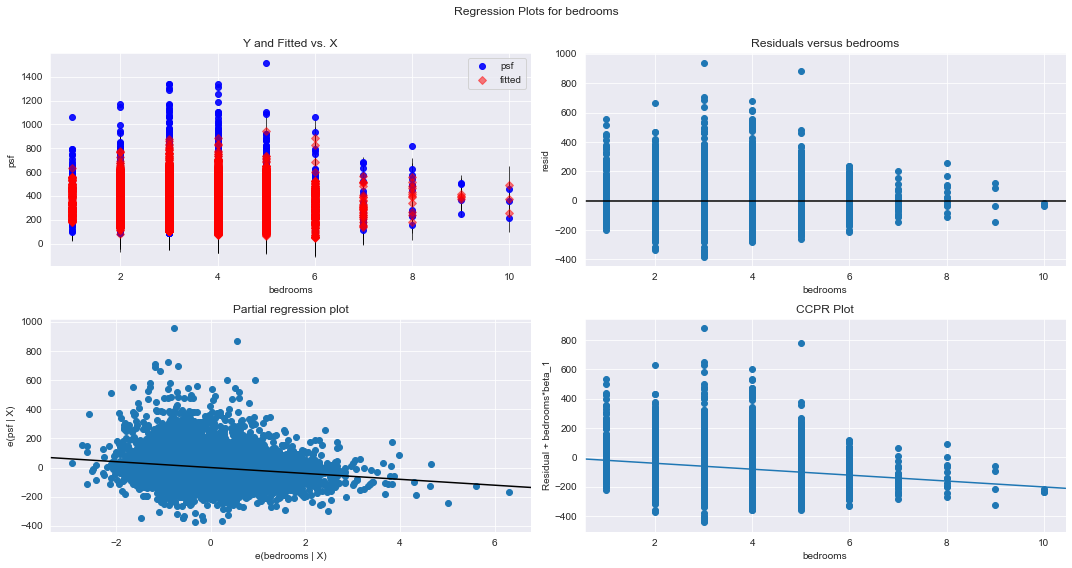

In [177]:
fig=plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(prepped_model,'bedrooms',fig=fig)
plt.show()

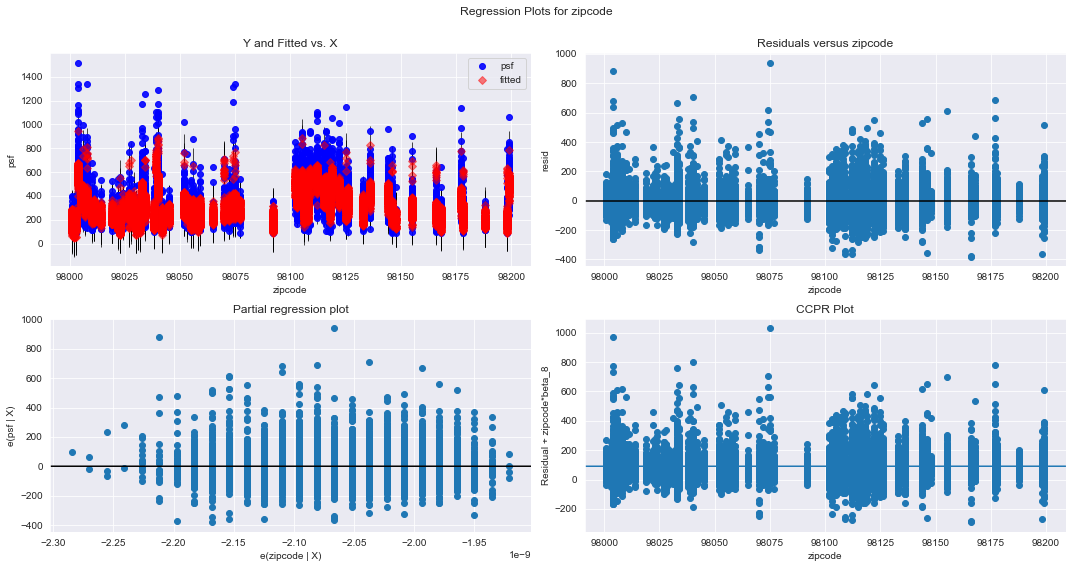

In [183]:
fig=plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(prepped_model,'zipcode',fig=fig)
plt.show()

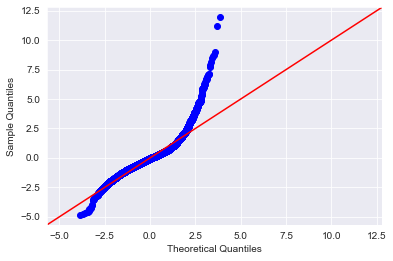

In [181]:
residuals = prepped_model.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [190]:
q1 = np.quantile(preprocessed['psf'],.25)
q3 = np.quantile(preprocessed['psf'],.75)
IQR = q3 - q1

In [194]:
preprocessed['psf'].loc[((q1-1.5*IQR)>preprocessed['psf']) | (preprocessed['psf']>(q3+1.5*IQR))]

21        858.369099
69        831.250000
100       669.944882
111       814.285714
125       732.323232
216       807.486631
246      1311.475410
282       779.467681
300      1184.615385
305       755.208333
312       706.231454
358       676.691729
427       734.463277
508       750.000000
556       681.818182
627       781.954887
634       703.896104
656      1317.596567
659       710.400000
751       833.333333
754      1103.896104
779       725.806452
801       726.190476
814       776.699029
924       712.230216
1029      756.302521
1030      853.658537
1071      837.837838
1072      735.820896
1080      717.391304
1096      755.833333
1115      711.340206
1150     1256.410256
1162      853.088481
1201      728.571429
1205      671.134021
1206      765.322581
1280      726.688103
1313     1060.000000
1359      769.230769
1369      749.950000
1421      693.069307
1431      920.289855
1446      796.130952
1467      767.058824
1504      680.000000
1582      745.945946
1591      714

In [195]:
preprocessed['psf'].loc[((q1-1.5*IQR)>preprocessed['psf']) | (preprocessed['psf']>(q3+1.5*IQR))].index

Int64Index([   21,    69,   100,   111,   125,   216,   246,   282,   300,
              305,
            ...
            20453, 20519, 20587, 20602, 20776, 20812, 20904, 21185, 21514,
            21560],
           dtype='int64', length=583)

In [196]:
outliers = preprocessed['psf'].loc[((q1-1.5*IQR)>preprocessed['psf']) | (preprocessed['psf']>(q3+1.5*IQR))].index

In [197]:
prepped_out = preprocessed.drop(outliers)

In [198]:
residuals = prepped_out.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

AttributeError: 'DataFrame' object has no attribute 'resid'

In [ ]:
x_p2 = prepped_out.drop('psf', axis=1)
y_p2 = prepped_out['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p2, y_p2, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model2 = model(X_train, X_test, y_train, y_test)

In [199]:
residuals = prepped_model2.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [201]:
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p2, y_p2, test_size=0.2)
linreg.fit(X_train, y_train)

LinearRegression()

In [202]:
prepped_model2 = model(X_train, X_test, y_train, y_test)

Train R2:  0.7292323304113073
Test R2:  0.7204922338465609
Train RMSE:  65.23250352205116
Test RMSE:  65.92808950525297


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     563.2
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:47:45   Log-Likelihood:                -94084.
No. Observations:               16810   AIC:                         1.883e+05
Df Residuals:                   16729   BIC:                         1.890e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.3584      0.126    -26.663      0.000      -3.605      -3.111
bedrooms       -17.5080      0.694    -25.228      0.000     -18.868     -16.148
bathrooms       -2.4955      1.128     -2.212      0.027      -4.707      -0.284
floors         -35.6908      1.543    -23.134      0.000     -38.715     -32.667
waterfront     198.5637      8.377     23.704      0.000     182.144     214.983
condition       17.8126      0.892     19.960      0.000      16.063      19.562
grade           10.2008      0.666     15.316      0.000       8.895      11.506
yr_built         0.0513      0.030      1.682      0.093      -0.008       0.111
zipcode          0.0005      0.001      0.740      0.460      -0.001       0.002
livtolot       -31.2698      3.022    -10.348      0.000     -37.193     -25.347
has_basement    67.2650      1.303     51.605      0.000      64.710      69.820
rec_reno        32.5517      3.533      9.213      0.000      25.626      39.477
location       -33.3458      3.190    -10.452      0.000     -39.599     -27.092
zone            33.9196      1.419     23.898      0.000      31.137      36.702
zip_98002       -6.3899      6.419     -0.995      0.320     -18.972       6.192
zip_98003       -2.3247      5.741     -0.405      0.686     -13.578       8.929
zip_98004      184.0841      4.740     38.839      0.000     174.794     193.374
zip_98005       52.8230      5.625      9.390      0.000      41.797      63.849
zip_98006       38.6899      3.603     10.738      0.000      31.628      45.752
zip_98007       28.7488      6.220      4.622      0.000      16.556      40.941
zip_98008       33.3654      4.573      7.296      0.000      24.401      42.330
zip_98010      -86.2584      7.618    -11.322      0.000    -101.191     -71.326
zip_98011      -43.4274      5.301     -8.193      0.000     -53.817     -33.038
zip_98014     -128.4772      6.759    -19.009      0.000    -141.725    -115.229
zip_98019     -138.7081      5.677    -24.432      0.000    -149.836    -127.580
zip_98022     -123.0102      5.656    -21.747      0.000    -134.097    -111.923
zip_98023      -12.0458      5.008     -2.405      0.016     -21.862      -2.229
zip_98024     -105.4624      8.108    -13.008      0.000    -121.354     -89.571
zip_98027      -10.5515      3.534     -2.986      0.003     -17.478      -3.625
zip_98028      -45.6957      4.444    -10.283      0.000     -54.406     -36.985
zip_98029        4.8986      4.316      1.135      0.256      -3.562      13.359
zip_98030        6.0673      6.042      1.004      0.315      -5.775      17.910
zip_98031       11.8270      5.934      1.993      0.046       0.196      23.458
zip_98032       -7.6646      7.537     -1.017      0.309     -22.438       7.109
zip_98033       68.1939      3.668     18.593      0.000      61.005      75.383
zip_9

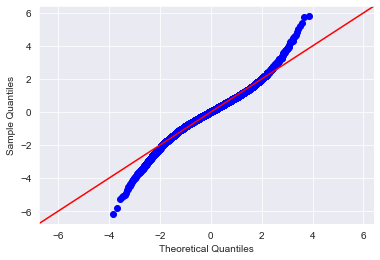

In [276]:
residuals = prepped_model2.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [269]:
prepped_log = preprocessed

In [270]:
prepped_log['psf'] = np.log(prepped_log['psf']) 

In [277]:
x_p3 = prepped_log.drop('psf', axis=1)
y_p3 = prepped_log['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p3, y_p3, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model3 = model(X_train, X_test, y_train, y_test)

Train R2:  0.7661921371024714
Test R2:  0.7716868699688496
Train RMSE:  0.045076600933558426
Test RMSE:  0.04421147924679


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     704.4
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:40:10   Log-Likelihood:                 29032.
No. Observations:               17276   AIC:                        -5.790e+04
Df Residuals:                   17195   BIC:                        -5.727e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0027   8.87e-05    -30.249      0.000      -0.003      -0.003
bedrooms        -0.0137      0.000    -29.271      0.000      -0.015      -0.013
bathrooms       -0.0033      0.001     -4.255      0.000      -0.005      -0.002
floors          -0.0252      0.001    -23.887      0.000      -0.027      -0.023
waterfront       0.1395      0.004     32.305      0.000       0.131       0.148
condition        0.0134      0.001     22.250      0.000       0.012       0.015
grade            0.0081      0.000     17.960      0.000       0.007       0.009
yr_built      9.361e-05   2.06e-05      4.542      0.000    5.32e-05       0.000
zipcode       2.097e-05   4.16e-07     50.462      0.000    2.02e-05    2.18e-05
livtolot        -0.0268      0.002    -12.951      0.000      -0.031      -0.023
has_basement     0.0517      0.001     58.303      0.000       0.050       0.053
rec_reno         0.0242      0.002     10.542      0.000       0.020       0.029
location        -0.0287      0.002    -13.209      0.000      -0.033      -0.024
zone             0.0290      0.001     28.975      0.000       0.027       0.031
zip_98002       -0.0083      0.005     -1.852      0.064      -0.017       0.000
zip_98003        0.0065      0.004      1.622      0.105      -0.001       0.014
zip_98004        0.1221      0.003     42.314      0.000       0.116       0.128
zip_98005        0.0372      0.004      9.551      0.000       0.030       0.045
zip_98006        0.0337      0.002     13.990      0.000       0.029       0.038
zip_98007        0.0269      0.004      6.192      0.000       0.018       0.035
zip_98008        0.0280      0.003      8.932      0.000       0.022       0.034
zip_98010       -0.0645      0.005    -11.836      0.000      -0.075      -0.054
zip_98011       -0.0217      0.004     -5.897      0.000      -0.029      -0.014
zip_98014       -0.0985      0.005    -21.152      0.000      -0.108      -0.089
zip_98019       -0.1070      0.004    -27.096      0.000      -0.115      -0.099
zip_98022       -0.0974      0.004    -24.915      0.000      -0.105      -0.090
zip_98023       -0.0066      0.004     -1.868      0.062      -0.014       0.000
zip_98024       -0.0802      0.006    -14.198      0.000      -0.091      -0.069
zip_98027        0.0046      0.002      1.854      0.064      -0.000       0.009
zip_98028       -0.0243      0.003     -7.819      0.000      -0.030      -0.018
zip_98029        0.0193      0.003      6.758      0.000       0.014       0.025
zip_98030        0.0067      0.004      1.584      0.113      -0.002       0.015
zip_98031        0.0140      0.004      3.424      0.001       0.006       0.022
zip_98032       -0.0022      0.005     -0.412      0.681      -0.013       0.008
zip_98033        0.0541      0.003     21.213      0.000       0.049       0.059
zip_9

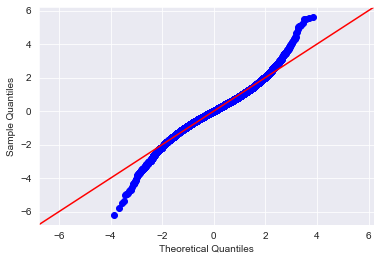

In [278]:
residuals = prepped_model3.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [272]:
prepped_sqrt = preprocessed

In [273]:
prepped_sqrt['psf'] = np.sqrt(prepped_sqrt['psf']) 

In [274]:
x_p4 = prepped_sqrt.drop('psf', axis=1)
y_p4 = prepped_sqrt['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p4, y_p4, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model4 = model(X_train, X_test, y_train, y_test)

Train R2:  0.765296012713313
Test R2:  0.774677228197491
Train RMSE:  0.044965606215770615
Test RMSE:  0.04467134314755946


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     700.8
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:39:59   Log-Likelihood:                 29074.
No. Observations:               17276   AIC:                        -5.799e+04
Df Residuals:                   17195   BIC:                        -5.736e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0027   8.81e-05    -30.652      0.000      -0.003      -0.003
bedrooms        -0.0129      0.000    -27.450      0.000      -0.014      -0.012
bathrooms       -0.0038      0.001     -4.928      0.000      -0.005      -0.002
floors          -0.0248      0.001    -23.690      0.000      -0.027      -0.023
waterfront       0.1406      0.004     32.574      0.000       0.132       0.149
condition        0.0131      0.001     21.844      0.000       0.012       0.014
grade            0.0079      0.000     17.518      0.000       0.007       0.009
yr_built      9.102e-05   2.05e-05      4.432      0.000    5.08e-05       0.000
zipcode       2.101e-05   4.14e-07     50.785      0.000    2.02e-05    2.18e-05
livtolot        -0.0261      0.002    -12.760      0.000      -0.030      -0.022
has_basement     0.0516      0.001     58.076      0.000       0.050       0.053
rec_reno         0.0244      0.002     10.592      0.000       0.020       0.029
location        -0.0276      0.002    -12.183      0.000      -0.032      -0.023
zone             0.0294      0.001     29.306      0.000       0.027       0.031
zip_98002       -0.0052      0.005     -1.144      0.252      -0.014       0.004
zip_98003        0.0057      0.004      1.408      0.159      -0.002       0.014
zip_98004        0.1219      0.003     42.544      0.000       0.116       0.127
zip_98005        0.0397      0.004     10.271      0.000       0.032       0.047
zip_98006        0.0327      0.002     13.700      0.000       0.028       0.037
zip_98007        0.0286      0.004      6.749      0.000       0.020       0.037
zip_98008        0.0284      0.003      9.098      0.000       0.022       0.034
zip_98010       -0.0635      0.005    -11.683      0.000      -0.074      -0.053
zip_98011       -0.0230      0.004     -6.290      0.000      -0.030      -0.016
zip_98014       -0.1014      0.005    -20.755      0.000      -0.111      -0.092
zip_98019       -0.1088      0.004    -27.895      0.000      -0.116      -0.101
zip_98022       -0.1013      0.004    -25.467      0.000      -0.109      -0.093
zip_98023       -0.0067      0.003     -1.925      0.054      -0.014       0.000
zip_98024       -0.0758      0.006    -13.545      0.000      -0.087      -0.065
zip_98027        0.0058      0.003      2.293      0.022       0.001       0.011
zip_98028       -0.0230      0.003     -7.505      0.000      -0.029      -0.017
zip_98029        0.0197      0.003      6.793      0.000       0.014       0.025
zip_98030        0.0081      0.004      1.939      0.053   -8.81e-05       0.016
zip_98031        0.0176      0.004      4.331      0.000       0.010       0.026
zip_98032       -0.0017      0.005     -0.328      0.743      -0.012       0.009
zip_98033        0.0545      0.003     21.346      0.000       0.049       0.059
zip_9

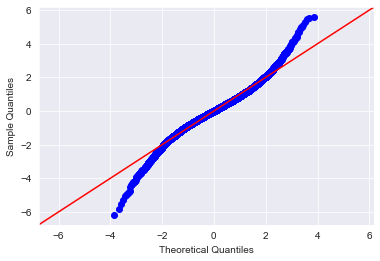

In [275]:
residuals = prepped_model4.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

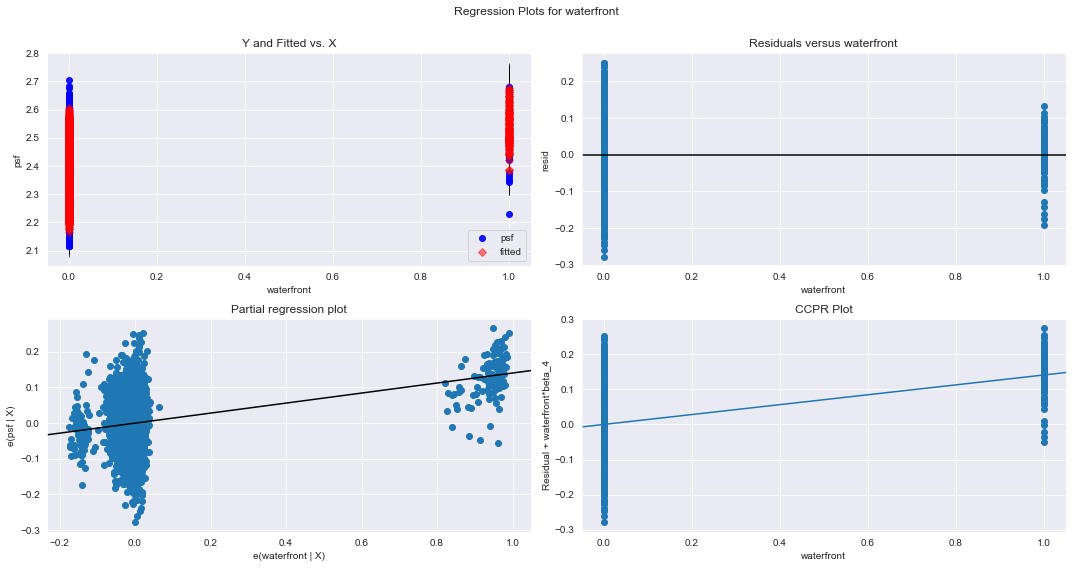

In [279]:
fig=plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(prepped_model4,'waterfront',fig=fig)
plt.show()

In [221]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'zipcode', 'livtolot', 'has_basement', 'rec_reno',
       'location', 'zone', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005',
       'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011',
       'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024',
       'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031',
       'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039',
       'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065',
       'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077',
       'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106',
       'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115',
       'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122',
       'zip_98125', 'zip_98126', 'zip_98133', 'zip_98

In [239]:
def remove_outliers(df):
    q1 = np.quantile(df,.25)
    q3 = np.quantile(df,.75)
    IQR = q3 - q1
    outliers = df.loc[((q1-1.5*IQR)>df) | (df>(q3+1.5*IQR))].index
    return outliers

In [280]:
def model_outlier(X_train, X_test, y_train, y_test):
    #remove outliers first to avoid data leakage
    outliers = remove_outliers(y_train)
    X_train = X_train.drop(outliers)
    y_train = y_train.drop(outliers)
    
    
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
    
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)
    
    
    return model

In [281]:
x_p = preprocessed.drop('psf', axis=1)
y_p = preprocessed['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model = model(X_train, X_test, y_train, y_test)

Train R2:  0.7679693280537568
Test R2:  0.7642124456425121
Train RMSE:  0.04494266860501361
Test RMSE:  0.044775398999923624


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     711.4
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:40:25   Log-Likelihood:                 29083.
No. Observations:               17276   AIC:                        -5.800e+04
Df Residuals:                   17195   BIC:                        -5.738e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0026   8.78e-05    -29.905      0.000      -0.003      -0.002
bedrooms        -0.0139      0.000    -29.252      0.000      -0.015      -0.013
bathrooms       -0.0029      0.001     -3.880      0.000      -0.004      -0.001
floors          -0.0247      0.001    -23.675      0.000      -0.027      -0.023
waterfront       0.1420      0.004     33.439      0.000       0.134       0.150
condition        0.0133      0.001     22.298      0.000       0.012       0.014
grade            0.0077      0.000     17.177      0.000       0.007       0.009
yr_built      9.729e-05   2.05e-05      4.738      0.000     5.7e-05       0.000
zipcode       2.094e-05   4.14e-07     50.598      0.000    2.01e-05    2.18e-05
livtolot        -0.0262      0.002    -12.725      0.000      -0.030      -0.022
has_basement     0.0517      0.001     58.538      0.000       0.050       0.053
rec_reno         0.0236      0.002     10.257      0.000       0.019       0.028
location        -0.0302      0.002    -13.762      0.000      -0.035      -0.026
zone             0.0286      0.001     28.881      0.000       0.027       0.031
zip_98002       -0.0098      0.004     -2.205      0.027      -0.018      -0.001
zip_98003        0.0037      0.004      0.918      0.359      -0.004       0.011
zip_98004        0.1229      0.003     41.912      0.000       0.117       0.129
zip_98005        0.0373      0.004      9.588      0.000       0.030       0.045
zip_98006        0.0313      0.002     13.088      0.000       0.027       0.036
zip_98007        0.0263      0.004      6.122      0.000       0.018       0.035
zip_98008        0.0282      0.003      9.054      0.000       0.022       0.034
zip_98010       -0.0625      0.005    -11.791      0.000      -0.073      -0.052
zip_98011       -0.0217      0.004     -5.853      0.000      -0.029      -0.014
zip_98014       -0.0962      0.005    -20.278      0.000      -0.106      -0.087
zip_98019       -0.1068      0.004    -27.125      0.000      -0.115      -0.099
zip_98022       -0.0990      0.004    -25.197      0.000      -0.107      -0.091
zip_98023       -0.0065      0.003     -1.873      0.061      -0.013       0.000
zip_98024       -0.0783      0.006    -14.111      0.000      -0.089      -0.067
zip_98027        0.0056      0.002      2.251      0.024       0.001       0.011
zip_98028       -0.0259      0.003     -8.132      0.000      -0.032      -0.020
zip_98029        0.0183      0.003      6.418      0.000       0.013       0.024
zip_98030        0.0049      0.004      1.185      0.236      -0.003       0.013
zip_98031        0.0164      0.004      4.034      0.000       0.008       0.024
zip_98032        0.0019      0.005      0.359      0.719      -0.008       0.012
zip_98033        0.0522      0.003     20.646      0.000       0.047       0.057
zip_9

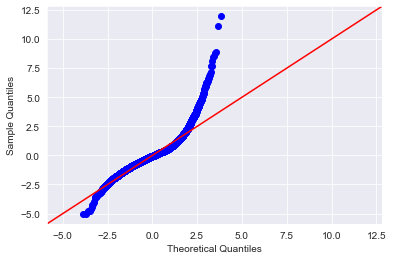

In [231]:
residuals = prepped_model.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [282]:
x_p2 = prepped_out.drop('psf', axis=1)
y_p2 = prepped_out['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p2, y_p2, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model2 = model(X_train, X_test, y_train, y_test)

Train R2:  0.753945091224471
Test R2:  0.7534475939279307
Train RMSE:  0.04354746134453567
Test RMSE:  0.043617455438761894


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     640.7
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:40:34   Log-Likelihood:                 28829.
No. Observations:               16810   AIC:                        -5.750e+04
Df Residuals:                   16729   BIC:                        -5.687e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0027   8.71e-05    -30.919      0.000      -0.003      -0.003
bedrooms        -0.0130      0.000    -28.042      0.000      -0.014      -0.012
bathrooms       -0.0044      0.001     -5.802      0.000      -0.006      -0.003
floors          -0.0236      0.001    -22.920      0.000      -0.026      -0.022
waterfront       0.1232      0.006     20.889      0.000       0.112       0.135
condition        0.0127      0.001     21.321      0.000       0.012       0.014
grade            0.0075      0.000     16.813      0.000       0.007       0.008
yr_built         0.0001   2.03e-05      5.969      0.000    8.15e-05       0.000
zipcode       2.044e-05   4.09e-07     49.945      0.000    1.96e-05    2.12e-05
livtolot        -0.0258      0.002    -12.745      0.000      -0.030      -0.022
has_basement     0.0498      0.001     57.027      0.000       0.048       0.052
rec_reno         0.0228      0.002      9.599      0.000       0.018       0.027
location        -0.0310      0.002    -14.415      0.000      -0.035      -0.027
zone             0.0292      0.001     29.647      0.000       0.027       0.031
zip_98002       -0.0032      0.004     -0.743      0.457      -0.012       0.005
zip_98003        0.0087      0.004      2.194      0.028       0.001       0.017
zip_98004        0.1105      0.003     34.703      0.000       0.104       0.117
zip_98005        0.0394      0.004      9.822      0.000       0.032       0.047
zip_98006        0.0317      0.002     13.215      0.000       0.027       0.036
zip_98007        0.0300      0.004      7.217      0.000       0.022       0.038
zip_98008        0.0305      0.003      9.916      0.000       0.024       0.037
zip_98010       -0.0694      0.005    -13.352      0.000      -0.080      -0.059
zip_98011       -0.0196      0.004     -5.441      0.000      -0.027      -0.013
zip_98014       -0.0943      0.005    -20.699      0.000      -0.103      -0.085
zip_98019       -0.1087      0.004    -28.961      0.000      -0.116      -0.101
zip_98022       -0.0981      0.004    -25.178      0.000      -0.106      -0.090
zip_98023       -0.0021      0.003     -0.604      0.546      -0.009       0.005
zip_98024       -0.0739      0.006    -13.211      0.000      -0.085      -0.063
zip_98027        0.0085      0.002      3.529      0.000       0.004       0.013
zip_98028       -0.0231      0.003     -7.709      0.000      -0.029      -0.017
zip_98029        0.0195      0.003      6.967      0.000       0.014       0.025
zip_98030        0.0123      0.004      3.013      0.003       0.004       0.020
zip_98031        0.0194      0.004      4.809      0.000       0.011       0.027
zip_98032        0.0029      0.005      0.562      0.574      -0.007       0.013
zip_98033        0.0484      0.003     19.000      0.000       0.043       0.053
zip_9

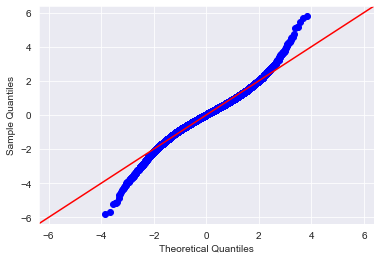

In [229]:
residuals = prepped_model2.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [226]:
x_p3 = prepped_log.drop('psf', axis=1)
y_p3 = prepped_log['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p3, y_p3, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model3 = model(X_train, X_test, y_train, y_test)

Train R2:  0.7537653532046845
Test R2:  0.754476326538302
Train RMSE:  0.04350821306723497
Test RMSE:  0.043752795623839845


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     640.1
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:43:33   Log-Likelihood:                 28844.
No. Observations:               16810   AIC:                        -5.753e+04
Df Residuals:                   16729   BIC:                        -5.690e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0026   8.61e-05    -30.382      0.000      -0.003      -0.002
bedrooms        -0.0129      0.000    -27.883      0.000      -0.014      -0.012
bathrooms       -0.0048      0.001     -6.320      0.000      -0.006      -0.003
floors          -0.0230      0.001    -22.228      0.000      -0.025      -0.021
waterfront       0.1193      0.006     21.083      0.000       0.108       0.130
condition        0.0129      0.001     21.707      0.000       0.012       0.014
grade            0.0074      0.000     16.521      0.000       0.007       0.008
yr_built         0.0001   2.03e-05      5.888      0.000    7.96e-05       0.000
zipcode       2.051e-05   4.08e-07     50.211      0.000    1.97e-05    2.13e-05
livtolot        -0.0263      0.002    -13.039      0.000      -0.030      -0.022
has_basement     0.0505      0.001     57.853      0.000       0.049       0.052
rec_reno         0.0237      0.002     10.239      0.000       0.019       0.028
location        -0.0307      0.002    -14.161      0.000      -0.035      -0.026
zone             0.0285      0.001     29.238      0.000       0.027       0.030
zip_98002       -0.0097      0.004     -2.204      0.028      -0.018      -0.001
zip_98003        0.0066      0.004      1.699      0.089      -0.001       0.014
zip_98004        0.1098      0.003     34.534      0.000       0.104       0.116
zip_98005        0.0396      0.004     10.438      0.000       0.032       0.047
zip_98006        0.0324      0.002     13.511      0.000       0.028       0.037
zip_98007        0.0300      0.004      7.322      0.000       0.022       0.038
zip_98008        0.0272      0.003      9.159      0.000       0.021       0.033
zip_98010       -0.0644      0.005    -11.869      0.000      -0.075      -0.054
zip_98011       -0.0215      0.004     -6.102      0.000      -0.028      -0.015
zip_98014       -0.0981      0.005    -21.601      0.000      -0.107      -0.089
zip_98019       -0.1064      0.004    -27.930      0.000      -0.114      -0.099
zip_98022       -0.0961      0.004    -25.082      0.000      -0.104      -0.089
zip_98023       -0.0044      0.003     -1.297      0.195      -0.011       0.002
zip_98024       -0.0708      0.005    -12.878      0.000      -0.082      -0.060
zip_98027        0.0076      0.002      3.132      0.002       0.003       0.012
zip_98028       -0.0215      0.003     -7.349      0.000      -0.027      -0.016
zip_98029        0.0191      0.003      6.873      0.000       0.014       0.025
zip_98030        0.0068      0.004      1.701      0.089      -0.001       0.015
zip_98031        0.0175      0.004      4.449      0.000       0.010       0.025
zip_98032        0.0014      0.005      0.269      0.788      -0.009       0.011
zip_98033        0.0496      0.002     20.161      0.000       0.045       0.054
zip_9

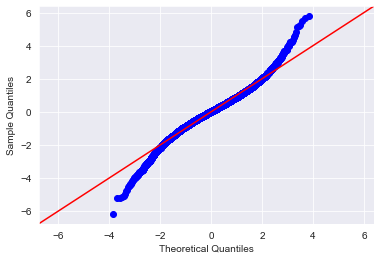

In [227]:
residuals = prepped_model3.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [224]:
x_p4 = prepped_sqrt.drop('psf', axis=1)
y_p4 = prepped_sqrt['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p4, y_p4, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model4 = model(X_train, X_test, y_train, y_test)

Train R2:  0.7567288286438089
Test R2:  0.741764111062015
Train RMSE:  0.0434694399903279
Test RMSE:  0.043939965325055196


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     650.5
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:42:20   Log-Likelihood:                 28859.
No. Observations:               16810   AIC:                        -5.756e+04
Df Residuals:                   16729   BIC:                        -5.693e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0027   8.48e-05    -31.836      0.000      -0.003      -0.003
bedrooms        -0.0124      0.000    -26.869      0.000      -0.013      -0.011
bathrooms       -0.0046      0.001     -6.113      0.000      -0.006      -0.003
floors          -0.0231      0.001    -22.436      0.000      -0.025      -0.021
waterfront       0.1250      0.005     22.765      0.000       0.114       0.136
condition        0.0127      0.001     21.486      0.000       0.012       0.014
grade            0.0075      0.000     16.897      0.000       0.007       0.008
yr_built         0.0001   2.02e-05      6.101      0.000    8.37e-05       0.000
zipcode       2.038e-05   4.07e-07     50.016      0.000    1.96e-05    2.12e-05
livtolot        -0.0271      0.002    -13.396      0.000      -0.031      -0.023
has_basement     0.0503      0.001     57.796      0.000       0.049       0.052
rec_reno         0.0207      0.002      8.759      0.000       0.016       0.025
location        -0.0290      0.002    -13.432      0.000      -0.033      -0.025
zone             0.0290      0.001     30.210      0.000       0.027       0.031
zip_98002       -0.0084      0.004     -1.923      0.054      -0.017       0.000
zip_98003        0.0071      0.004      1.838      0.066      -0.000       0.015
zip_98004        0.1107      0.003     34.039      0.000       0.104       0.117
zip_98005        0.0396      0.004     10.673      0.000       0.032       0.047
zip_98006        0.0310      0.002     13.131      0.000       0.026       0.036
zip_98007        0.0308      0.004      7.607      0.000       0.023       0.039
zip_98008        0.0288      0.003      9.616      0.000       0.023       0.035
zip_98010       -0.0720      0.005    -13.860      0.000      -0.082      -0.062
zip_98011       -0.0204      0.003     -5.833      0.000      -0.027      -0.014
zip_98014       -0.1008      0.005    -22.375      0.000      -0.110      -0.092
zip_98019       -0.1076      0.004    -28.313      0.000      -0.115      -0.100
zip_98022       -0.0968      0.004    -25.362      0.000      -0.104      -0.089
zip_98023       -0.0036      0.003     -1.051      0.293      -0.010       0.003
zip_98024       -0.0757      0.005    -13.785      0.000      -0.086      -0.065
zip_98027        0.0081      0.002      3.288      0.001       0.003       0.013
zip_98028       -0.0207      0.003     -7.048      0.000      -0.026      -0.015
zip_98029        0.0199      0.003      6.981      0.000       0.014       0.026
zip_98030        0.0079      0.004      2.001      0.045       0.000       0.016
zip_98031        0.0196      0.004      5.037      0.000       0.012       0.027
zip_98032        0.0016      0.005      0.325      0.745      -0.008       0.011
zip_98033        0.0521      0.002     21.026      0.000       0.047       0.057
zip_9

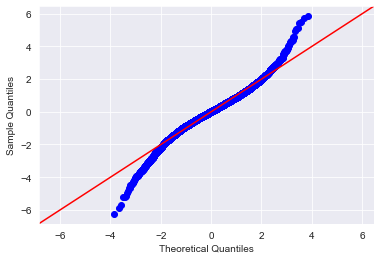

In [225]:
residuals = prepped_model4.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

Train R2:  0.7640109728078592
Test R2:  0.7780079061371368
Train RMSE:  0.04493478428954425
Test RMSE:  0.044213842800401845


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     695.2
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:40:41   Log-Likelihood:                 29057.
No. Observations:               17259   AIC:                        -5.795e+04
Df Residuals:                   17178   BIC:                        -5.732e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0028   8.83e-05    -31.466      0.000      -0.003      -0.003
bedrooms        -0.0136      0.000    -29.198      0.000      -0.015      -0.013
bathrooms       -0.0032      0.001     -4.125      0.000      -0.005      -0.002
floors          -0.0258      0.001    -24.491      0.000      -0.028      -0.024
waterfront       0.1344      0.004     29.885      0.000       0.126       0.143
condition        0.0125      0.001     20.974      0.000       0.011       0.014
grade            0.0083      0.000     18.511      0.000       0.007       0.009
yr_built         0.0001   2.07e-05      5.020      0.000    6.34e-05       0.000
zipcode       2.075e-05   4.17e-07     49.742      0.000    1.99e-05    2.16e-05
livtolot        -0.0267      0.002    -12.830      0.000      -0.031      -0.023
has_basement     0.0511      0.001     57.568      0.000       0.049       0.053
rec_reno         0.0252      0.002     10.832      0.000       0.021       0.030
location        -0.0304      0.002    -13.542      0.000      -0.035      -0.026
zone             0.0297      0.001     29.667      0.000       0.028       0.032
zip_98002       -0.0035      0.004     -0.772      0.440      -0.012       0.005
zip_98003        0.0061      0.004      1.530      0.126      -0.002       0.014
zip_98004        0.1187      0.003     40.688      0.000       0.113       0.124
zip_98005        0.0383      0.004      9.676      0.000       0.031       0.046
zip_98006        0.0320      0.002     13.262      0.000       0.027       0.037
zip_98007        0.0273      0.004      6.545      0.000       0.019       0.036
zip_98008        0.0278      0.003      9.072      0.000       0.022       0.034
zip_98010       -0.0659      0.005    -12.455      0.000      -0.076      -0.056
zip_98011       -0.0221      0.004     -6.085      0.000      -0.029      -0.015
zip_98014       -0.0978      0.005    -20.614      0.000      -0.107      -0.088
zip_98019       -0.1097      0.004    -27.813      0.000      -0.117      -0.102
zip_98022       -0.0989      0.004    -25.324      0.000      -0.107      -0.091
zip_98023       -0.0026      0.003     -0.732      0.464      -0.009       0.004
zip_98024       -0.0805      0.006    -14.098      0.000      -0.092      -0.069
zip_98027        0.0052      0.002      2.125      0.034       0.000       0.010
zip_98028       -0.0220      0.003     -7.046      0.000      -0.028      -0.016
zip_98029        0.0188      0.003      6.521      0.000       0.013       0.024
zip_98030        0.0112      0.004      2.699      0.007       0.003       0.019
zip_98031        0.0207      0.004      5.145      0.000       0.013       0.029
zip_98032        0.0051      0.005      0.976      0.329      -0.005       0.015
zip_98033        0.0533      0.002     21.503      0.000       0.048       0.058
zip_9

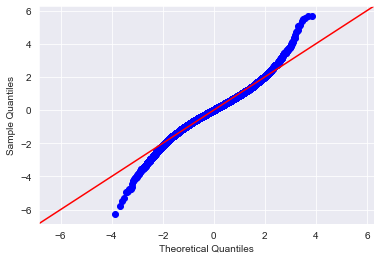

In [283]:
x_p = preprocessed.drop('psf', axis=1)
y_p = preprocessed['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model = model_outlier(X_train, X_test, y_train, y_test)

NameError: name 'y_train' is not defined

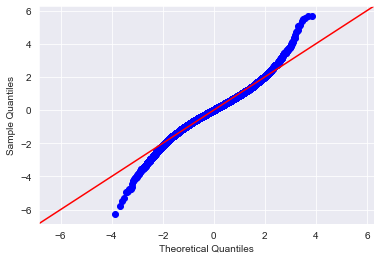

In [284]:
residuals = prepped_model.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

<AxesSubplot:xlabel='psf'>

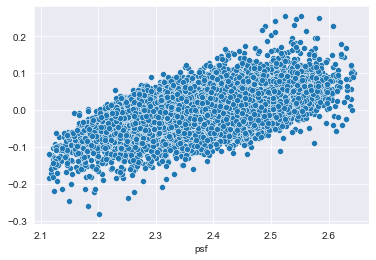

In [285]:
sns.scatterplot(y_p,prepped_model.resid)

Train R2:  0.7651651825223053
Test R2:  0.7715972688576072
Train RMSE:  0.044830408332522
Test RMSE:  0.044719755955725915


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     699.6
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:40:58   Log-Likelihood:                 29094.
No. Observations:               17257   AIC:                        -5.803e+04
Df Residuals:                   17176   BIC:                        -5.740e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0027   8.85e-05    -29.971      0.000      -0.003      -0.002
bedrooms        -0.0134      0.000    -28.703      0.000      -0.014      -0.012
bathrooms       -0.0034      0.001     -4.533      0.000      -0.005      -0.002
floors          -0.0246      0.001    -23.384      0.000      -0.027      -0.023
waterfront       0.1275      0.005     27.671      0.000       0.118       0.137
condition        0.0135      0.001     22.659      0.000       0.012       0.015
grade            0.0078      0.000     17.301      0.000       0.007       0.009
yr_built         0.0001   2.07e-05      5.544      0.000    7.41e-05       0.000
zipcode       2.057e-05   4.16e-07     49.405      0.000    1.98e-05    2.14e-05
livtolot        -0.0277      0.002    -13.231      0.000      -0.032      -0.024
has_basement     0.0516      0.001     58.051      0.000       0.050       0.053
rec_reno         0.0251      0.002     11.019      0.000       0.021       0.030
location        -0.0304      0.002    -13.773      0.000      -0.035      -0.026
zone             0.0288      0.001     28.801      0.000       0.027       0.031
zip_98002       -0.0061      0.004     -1.370      0.171      -0.015       0.003
zip_98003        0.0048      0.004      1.212      0.226      -0.003       0.013
zip_98004        0.1193      0.003     40.515      0.000       0.114       0.125
zip_98005        0.0405      0.004     10.442      0.000       0.033       0.048
zip_98006        0.0310      0.002     12.982      0.000       0.026       0.036
zip_98007        0.0268      0.004      6.152      0.000       0.018       0.035
zip_98008        0.0292      0.003      9.606      0.000       0.023       0.035
zip_98010       -0.0622      0.006    -11.145      0.000      -0.073      -0.051
zip_98011       -0.0226      0.004     -6.358      0.000      -0.030      -0.016
zip_98014       -0.1027      0.005    -21.495      0.000      -0.112      -0.093
zip_98019       -0.1078      0.004    -27.104      0.000      -0.116      -0.100
zip_98022       -0.0980      0.004    -25.205      0.000      -0.106      -0.090
zip_98023       -0.0054      0.004     -1.520      0.128      -0.012       0.002
zip_98024       -0.0753      0.006    -12.713      0.000      -0.087      -0.064
zip_98027        0.0038      0.003      1.490      0.136      -0.001       0.009
zip_98028       -0.0230      0.003     -7.472      0.000      -0.029      -0.017
zip_98029        0.0182      0.003      6.198      0.000       0.012       0.024
zip_98030        0.0064      0.004      1.529      0.126      -0.002       0.015
zip_98031        0.0167      0.004      4.119      0.000       0.009       0.025
zip_98032       -0.0018      0.005     -0.338      0.735      -0.012       0.009
zip_98033        0.0512      0.002     20.838      0.000       0.046       0.056
zip_9

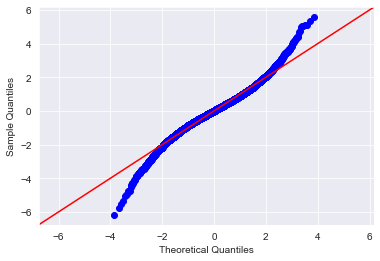

In [286]:
x_p = preprocessed.drop('psf', axis=1)
y_p = preprocessed['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model = model_outlier(X_train, X_test, y_train, y_test)

<AxesSubplot:xlabel='psf'>

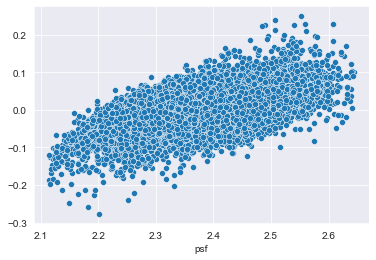

In [287]:
sns.scatterplot(y_p,prepped_model.resid)

Train R2:  0.7564471517877547
Test R2:  0.7435783358312003
Train RMSE:  0.0433236506184422
Test RMSE:  0.04449739150392559


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     649.5
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:41:03   Log-Likelihood:                 28915.
No. Observations:               16810   AIC:                        -5.767e+04
Df Residuals:                   16729   BIC:                        -5.704e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0027   8.49e-05    -31.592      0.000      -0.003      -0.003
bedrooms        -0.0128      0.000    -27.774      0.000      -0.014      -0.012
bathrooms       -0.0046      0.001     -6.110      0.000      -0.006      -0.003
floors          -0.0233      0.001    -22.593      0.000      -0.025      -0.021
waterfront       0.1232      0.006     21.184      0.000       0.112       0.135
condition        0.0130      0.001     22.113      0.000       0.012       0.014
grade            0.0072      0.000     16.216      0.000       0.006       0.008
yr_built         0.0001   2.03e-05      6.673      0.000    9.57e-05       0.000
zipcode       2.017e-05   4.09e-07     49.342      0.000    1.94e-05     2.1e-05
livtolot        -0.0267      0.002    -12.983      0.000      -0.031      -0.023
has_basement     0.0498      0.001     57.399      0.000       0.048       0.052
rec_reno         0.0234      0.002      9.952      0.000       0.019       0.028
location        -0.0297      0.002    -13.766      0.000      -0.034      -0.025
zone             0.0290      0.001     30.125      0.000       0.027       0.031
zip_98002       -0.0048      0.004     -1.129      0.259      -0.013       0.004
zip_98003        0.0061      0.004      1.567      0.117      -0.002       0.014
zip_98004        0.1102      0.003     34.608      0.000       0.104       0.116
zip_98005        0.0405      0.004     10.845      0.000       0.033       0.048
zip_98006        0.0333      0.002     14.158      0.000       0.029       0.038
zip_98007        0.0313      0.004      7.401      0.000       0.023       0.040
zip_98008        0.0285      0.003      9.380      0.000       0.023       0.034
zip_98010       -0.0637      0.005    -12.125      0.000      -0.074      -0.053
zip_98011       -0.0202      0.004     -5.719      0.000      -0.027      -0.013
zip_98014       -0.0966      0.004    -21.707      0.000      -0.105      -0.088
zip_98019       -0.1084      0.004    -28.633      0.000      -0.116      -0.101
zip_98022       -0.0969      0.004    -25.682      0.000      -0.104      -0.089
zip_98023       -0.0022      0.003     -0.655      0.512      -0.009       0.004
zip_98024       -0.0796      0.006    -14.449      0.000      -0.090      -0.069
zip_98027        0.0089      0.002      3.620      0.000       0.004       0.014
zip_98028       -0.0219      0.003     -7.351      0.000      -0.028      -0.016
zip_98029        0.0192      0.003      6.961      0.000       0.014       0.025
zip_98030        0.0066      0.004      1.659      0.097      -0.001       0.014
zip_98031        0.0179      0.004      4.595      0.000       0.010       0.026
zip_98032     8.948e-05      0.005      0.017      0.986      -0.010       0.010
zip_98033        0.0467      0.002     18.836      0.000       0.042       0.052
zip_9

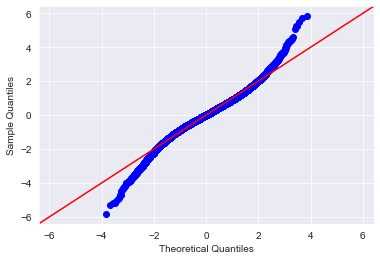

In [288]:
x_p2 = prepped_out.drop('psf', axis=1)
y_p2 = prepped_out['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p2, y_p2, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model2 = model_outlier(X_train, X_test, y_train, y_test)

<AxesSubplot:xlabel='psf'>

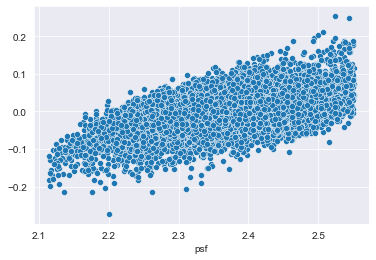

In [256]:
sns.scatterplot(y_p2,prepped_model2.resid)

Train R2:  0.7653581953101473
Test R2:  0.7720539328647273
Train RMSE:  0.044967018231021665
Test RMSE:  0.04433106059223721


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     700.6
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:41:16   Log-Likelihood:                 29052.
No. Observations:               17263   AIC:                        -5.794e+04
Df Residuals:                   17182   BIC:                        -5.731e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0027   8.86e-05    -30.621      0.000      -0.003      -0.003
bedrooms        -0.0137      0.000    -29.069      0.000      -0.015      -0.013
bathrooms       -0.0024      0.001     -3.188      0.001      -0.004      -0.001
floors          -0.0260      0.001    -24.846      0.000      -0.028      -0.024
waterfront       0.1385      0.005     30.771      0.000       0.130       0.147
condition        0.0127      0.001     21.166      0.000       0.012       0.014
grade            0.0079      0.000     17.544      0.000       0.007       0.009
yr_built      9.377e-05   2.05e-05      4.567      0.000    5.35e-05       0.000
zipcode       2.098e-05   4.14e-07     50.719      0.000    2.02e-05    2.18e-05
livtolot        -0.0262      0.002    -12.674      0.000      -0.030      -0.022
has_basement     0.0508      0.001     57.243      0.000       0.049       0.053
rec_reno         0.0253      0.002     11.034      0.000       0.021       0.030
location        -0.0295      0.002    -12.922      0.000      -0.034      -0.025
zone             0.0294      0.001     29.275      0.000       0.027       0.031
zip_98002       -0.0047      0.004     -1.054      0.292      -0.013       0.004
zip_98003        0.0051      0.004      1.270      0.204      -0.003       0.013
zip_98004        0.1199      0.003     40.442      0.000       0.114       0.126
zip_98005        0.0400      0.004     10.617      0.000       0.033       0.047
zip_98006        0.0318      0.002     13.055      0.000       0.027       0.037
zip_98007        0.0289      0.004      6.624      0.000       0.020       0.037
zip_98008        0.0290      0.003      9.251      0.000       0.023       0.035
zip_98010       -0.0621      0.005    -11.346      0.000      -0.073      -0.051
zip_98011       -0.0219      0.004     -6.092      0.000      -0.029      -0.015
zip_98014       -0.0997      0.005    -20.545      0.000      -0.109      -0.090
zip_98019       -0.1098      0.004    -28.385      0.000      -0.117      -0.102
zip_98022       -0.1000      0.004    -25.125      0.000      -0.108      -0.092
zip_98023       -0.0039      0.003     -1.113      0.266      -0.011       0.003
zip_98024       -0.0741      0.006    -13.059      0.000      -0.085      -0.063
zip_98027        0.0043      0.002      1.722      0.085      -0.001       0.009
zip_98028       -0.0235      0.003     -7.705      0.000      -0.030      -0.018
zip_98029        0.0201      0.003      7.041      0.000       0.015       0.026
zip_98030        0.0087      0.004      2.099      0.036       0.001       0.017
zip_98031        0.0180      0.004      4.402      0.000       0.010       0.026
zip_98032        0.0032      0.005      0.608      0.543      -0.007       0.013
zip_98033        0.0529      0.003     21.162      0.000       0.048       0.058
zip_9

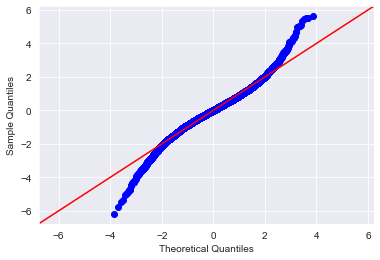

In [289]:
x_p3 = prepped_log.drop('psf', axis=1)
y_p3 = prepped_log['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p3, y_p3, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model3 = model_outlier(X_train, X_test, y_train, y_test)

<AxesSubplot:xlabel='psf'>

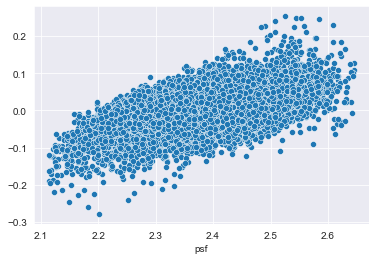

In [290]:
sns.scatterplot(y_p3,prepped_model3.resid)

Train R2:  0.7649008796233316
Test R2:  0.7728595111396993
Train RMSE:  0.044876238240468144
Test RMSE:  0.04456512796559015


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     698.6
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:41:32   Log-Likelihood:                 29078.
No. Observations:               17258   AIC:                        -5.799e+04
Df Residuals:                   17177   BIC:                        -5.737e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0027   8.73e-05    -30.646      0.000      -0.003      -0.003
bedrooms        -0.0134      0.000    -28.670      0.000      -0.014      -0.013
bathrooms       -0.0031      0.001     -4.129      0.000      -0.005      -0.002
floors          -0.0254      0.001    -24.273      0.000      -0.027      -0.023
waterfront       0.1343      0.004     30.215      0.000       0.126       0.143
condition        0.0128      0.001     21.241      0.000       0.012       0.014
grade            0.0082      0.000     18.338      0.000       0.007       0.009
yr_built      8.867e-05   2.05e-05      4.318      0.000    4.84e-05       0.000
zipcode       2.108e-05   4.13e-07     50.995      0.000    2.03e-05    2.19e-05
livtolot        -0.0268      0.002    -12.820      0.000      -0.031      -0.023
has_basement     0.0512      0.001     57.991      0.000       0.049       0.053
rec_reno         0.0262      0.002     11.477      0.000       0.022       0.031
location        -0.0308      0.002    -14.005      0.000      -0.035      -0.026
zone             0.0289      0.001     29.318      0.000       0.027       0.031
zip_98002       -0.0088      0.004     -1.962      0.050      -0.018   -8.45e-06
zip_98003        0.0058      0.004      1.467      0.142      -0.002       0.014
zip_98004        0.1178      0.003     40.726      0.000       0.112       0.123
zip_98005        0.0389      0.004      9.946      0.000       0.031       0.047
zip_98006        0.0312      0.002     12.708      0.000       0.026       0.036
zip_98007        0.0269      0.004      6.343      0.000       0.019       0.035
zip_98008        0.0261      0.003      8.610      0.000       0.020       0.032
zip_98010       -0.0600      0.005    -11.286      0.000      -0.070      -0.050
zip_98011       -0.0231      0.004     -6.458      0.000      -0.030      -0.016
zip_98014       -0.1008      0.005    -21.111      0.000      -0.110      -0.091
zip_98019       -0.1067      0.004    -27.511      0.000      -0.114      -0.099
zip_98022       -0.0980      0.004    -25.136      0.000      -0.106      -0.090
zip_98023       -0.0037      0.003     -1.059      0.290      -0.010       0.003
zip_98024       -0.0758      0.006    -13.581      0.000      -0.087      -0.065
zip_98027        0.0061      0.003      2.435      0.015       0.001       0.011
zip_98028       -0.0225      0.003     -7.229      0.000      -0.029      -0.016
zip_98029        0.0193      0.003      6.439      0.000       0.013       0.025
zip_98030        0.0084      0.004      2.019      0.043       0.000       0.017
zip_98031        0.0172      0.004      4.257      0.000       0.009       0.025
zip_98032       -0.0014      0.005     -0.267      0.789      -0.011       0.009
zip_98033        0.0526      0.003     20.955      0.000       0.048       0.057
zip_9

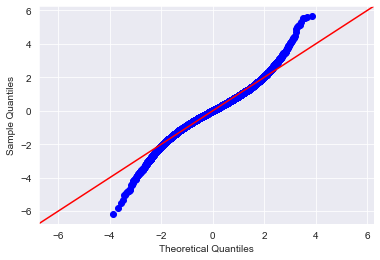

In [291]:
x_p4 = prepped_sqrt.drop('psf', axis=1)
y_p4 = prepped_sqrt['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p4, y_p4, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model4 = model_outlier(X_train, X_test, y_train, y_test)

<AxesSubplot:xlabel='psf'>

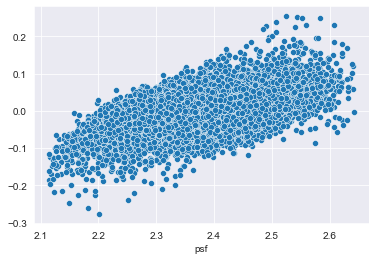

In [292]:
sns.scatterplot(y_p4,prepped_model4.resid)

In [293]:
def model_outlier2(X_train, X_test, y_train, y_test):
    #remove outliers first to avoid data leakage
    train_outliers = remove_outliers(y_train)
    X_train = X_train.drop(train_outliers)
    y_train = y_train.drop(train_outliers)
    
    test_outliers = remove_outliers(y_test)
    X_test = X_test.drop(test_outliers)
    y_test = y_test.drop(test_outliers)
    
    
    
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
    
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)
    
    
    return model

Train R2:  0.7692468614136763
Test R2:  0.7554313243175034
Train RMSE:  0.044473348873600015
Test RMSE:  0.046036028763733534


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     715.8
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:41:49   Log-Likelihood:                 29234.
No. Observations:               17258   AIC:                        -5.831e+04
Df Residuals:                   17177   BIC:                        -5.768e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0027   8.74e-05    -31.246      0.000      -0.003      -0.003
bedrooms        -0.0132      0.000    -28.304      0.000      -0.014      -0.012
bathrooms       -0.0036      0.001     -4.799      0.000      -0.005      -0.002
floors          -0.0251      0.001    -24.087      0.000      -0.027      -0.023
waterfront       0.1350      0.004     31.732      0.000       0.127       0.143
condition        0.0133      0.001     22.545      0.000       0.012       0.015
grade            0.0080      0.000     17.849      0.000       0.007       0.009
yr_built         0.0001   2.04e-05      5.924      0.000    8.07e-05       0.000
zipcode       2.044e-05    4.1e-07     49.822      0.000    1.96e-05    2.12e-05
livtolot        -0.0279      0.002    -13.272      0.000      -0.032      -0.024
has_basement     0.0506      0.001     57.346      0.000       0.049       0.052
rec_reno         0.0245      0.002     10.714      0.000       0.020       0.029
location        -0.0316      0.002    -14.129      0.000      -0.036      -0.027
zone             0.0289      0.001     29.189      0.000       0.027       0.031
zip_98002       -0.0070      0.004     -1.617      0.106      -0.015       0.001
zip_98003        0.0074      0.004      1.842      0.065      -0.000       0.015
zip_98004        0.1197      0.003     40.873      0.000       0.114       0.125
zip_98005        0.0382      0.004      9.608      0.000       0.030       0.046
zip_98006        0.0328      0.002     14.114      0.000       0.028       0.037
zip_98007        0.0286      0.004      6.977      0.000       0.021       0.037
zip_98008        0.0289      0.003      9.407      0.000       0.023       0.035
zip_98010       -0.0699      0.005    -13.260      0.000      -0.080      -0.060
zip_98011       -0.0230      0.004     -6.522      0.000      -0.030      -0.016
zip_98014       -0.0964      0.005    -20.244      0.000      -0.106      -0.087
zip_98019       -0.1077      0.004    -28.518      0.000      -0.115      -0.100
zip_98022       -0.0983      0.004    -24.788      0.000      -0.106      -0.091
zip_98023       -0.0033      0.003     -0.959      0.338      -0.010       0.003
zip_98024       -0.0800      0.005    -14.655      0.000      -0.091      -0.069
zip_98027        0.0059      0.002      2.346      0.019       0.001       0.011
zip_98028       -0.0247      0.003     -8.141      0.000      -0.031      -0.019
zip_98029        0.0188      0.003      6.477      0.000       0.013       0.024
zip_98030        0.0089      0.004      2.167      0.030       0.001       0.017
zip_98031        0.0188      0.004      4.665      0.000       0.011       0.027
zip_98032        0.0023      0.005      0.444      0.657      -0.008       0.012
zip_98033        0.0485      0.003     18.972      0.000       0.044       0.054
zip_9

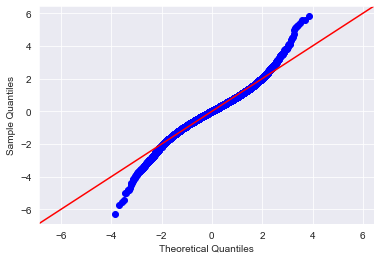

In [294]:
x_p = preprocessed.drop('psf', axis=1)
y_p = preprocessed['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model = model_outlier2(X_train, X_test, y_train, y_test)

<AxesSubplot:xlabel='psf'>

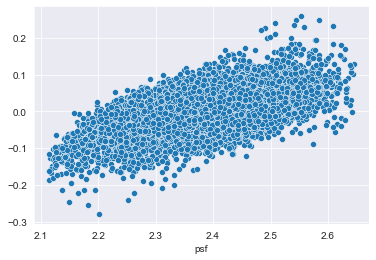

In [295]:
sns.scatterplot(y_p,prepped_model.resid)

Train R2:  0.7501117034367852
Test R2:  0.7684933192568794
Train RMSE:  0.04377979757215801
Test RMSE:  0.042671272571988696


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     627.7
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:42:05   Log-Likelihood:                 28739.
No. Observations:               16810   AIC:                        -5.732e+04
Df Residuals:                   16729   BIC:                        -5.669e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0026   8.66e-05    -30.458      0.000      -0.003      -0.002
bedrooms        -0.0127      0.000    -27.114      0.000      -0.014      -0.012
bathrooms       -0.0040      0.001     -5.254      0.000      -0.005      -0.003
floors          -0.0244      0.001    -23.523      0.000      -0.026      -0.022
waterfront       0.1201      0.006     20.822      0.000       0.109       0.131
condition        0.0130      0.001     21.817      0.000       0.012       0.014
grade            0.0073      0.000     16.221      0.000       0.006       0.008
yr_built         0.0001   2.04e-05      6.167      0.000    8.59e-05       0.000
zipcode       2.037e-05   4.11e-07     49.545      0.000    1.96e-05    2.12e-05
livtolot        -0.0245      0.002    -12.011      0.000      -0.029      -0.021
has_basement     0.0489      0.001     55.864      0.000       0.047       0.051
rec_reno         0.0211      0.002      8.889      0.000       0.016       0.026
location        -0.0307      0.002    -14.197      0.000      -0.035      -0.026
zone             0.0286      0.001     29.178      0.000       0.027       0.030
zip_98002       -0.0065      0.004     -1.511      0.131      -0.015       0.002
zip_98003        0.0063      0.004      1.602      0.109      -0.001       0.014
zip_98004        0.1052      0.003     31.227      0.000       0.099       0.112
zip_98005        0.0388      0.004     10.107      0.000       0.031       0.046
zip_98006        0.0313      0.002     13.050      0.000       0.027       0.036
zip_98007        0.0297      0.004      7.115      0.000       0.022       0.038
zip_98008        0.0297      0.003      9.861      0.000       0.024       0.036
zip_98010       -0.0628      0.005    -11.834      0.000      -0.073      -0.052
zip_98011       -0.0198      0.003     -5.700      0.000      -0.027      -0.013
zip_98014       -0.0931      0.005    -19.675      0.000      -0.102      -0.084
zip_98019       -0.1086      0.004    -27.970      0.000      -0.116      -0.101
zip_98022       -0.0950      0.004    -24.820      0.000      -0.102      -0.087
zip_98023       -0.0056      0.003     -1.629      0.103      -0.012       0.001
zip_98024       -0.0703      0.006    -12.523      0.000      -0.081      -0.059
zip_98027        0.0079      0.002      3.247      0.001       0.003       0.013
zip_98028       -0.0214      0.003     -7.283      0.000      -0.027      -0.016
zip_98029        0.0195      0.003      7.010      0.000       0.014       0.025
zip_98030        0.0085      0.004      2.139      0.032       0.001       0.016
zip_98031        0.0177      0.004      4.447      0.000       0.010       0.025
zip_98032        0.0033      0.005      0.663      0.507      -0.007       0.013
zip_98033        0.0479      0.003     18.803      0.000       0.043       0.053
zip_9

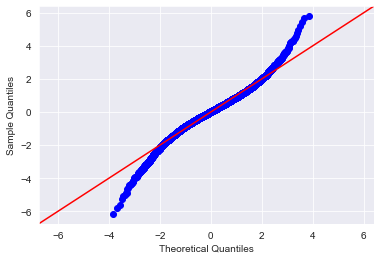

In [296]:
x_p2 = prepped_out.drop('psf', axis=1)
y_p2 = prepped_out['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p2, y_p2, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model2 = model_outlier2(X_train, X_test, y_train, y_test)

Train R2:  0.7696835362703673
Test R2:  0.7536536925682392
Train RMSE:  0.044559447696629347
Test RMSE:  0.0456750937477244


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     717.5
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:42:27   Log-Likelihood:                 29199.
No. Observations:               17257   AIC:                        -5.824e+04
Df Residuals:                   17176   BIC:                        -5.761e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0027   8.76e-05    -30.416      0.000      -0.003      -0.002
bedrooms        -0.0136      0.000    -29.198      0.000      -0.014      -0.013
bathrooms       -0.0031      0.001     -4.155      0.000      -0.005      -0.002
floors          -0.0250      0.001    -24.082      0.000      -0.027      -0.023
waterfront       0.1347      0.005     29.553      0.000       0.126       0.144
condition        0.0132      0.001     22.133      0.000       0.012       0.014
grade            0.0083      0.000     18.565      0.000       0.007       0.009
yr_built         0.0001   2.04e-05      4.935      0.000    6.08e-05       0.000
zipcode       2.083e-05   4.12e-07     50.570      0.000       2e-05    2.16e-05
livtolot        -0.0273      0.002    -13.014      0.000      -0.031      -0.023
has_basement     0.0513      0.001     58.095      0.000       0.050       0.053
rec_reno         0.0235      0.002     10.201      0.000       0.019       0.028
location        -0.0302      0.002    -13.719      0.000      -0.035      -0.026
zone             0.0287      0.001     28.972      0.000       0.027       0.031
zip_98002       -0.0073      0.004     -1.651      0.099      -0.016       0.001
zip_98003        0.0064      0.004      1.619      0.105      -0.001       0.014
zip_98004        0.1183      0.003     41.354      0.000       0.113       0.124
zip_98005        0.0355      0.004      8.876      0.000       0.028       0.043
zip_98006        0.0323      0.002     13.619      0.000       0.028       0.037
zip_98007        0.0273      0.004      6.318      0.000       0.019       0.036
zip_98008        0.0286      0.003      9.299      0.000       0.023       0.035
zip_98010       -0.0611      0.005    -11.604      0.000      -0.071      -0.051
zip_98011       -0.0214      0.004     -5.864      0.000      -0.029      -0.014
zip_98014       -0.0999      0.005    -20.964      0.000      -0.109      -0.091
zip_98019       -0.1069      0.004    -27.134      0.000      -0.115      -0.099
zip_98022       -0.1012      0.004    -26.347      0.000      -0.109      -0.094
zip_98023       -0.0068      0.003     -1.972      0.049      -0.014   -4.16e-05
zip_98024       -0.0760      0.006    -12.804      0.000      -0.088      -0.064
zip_98027        0.0043      0.003      1.694      0.090      -0.001       0.009
zip_98028       -0.0247      0.003     -8.185      0.000      -0.031      -0.019
zip_98029        0.0189      0.003      6.605      0.000       0.013       0.024
zip_98030        0.0055      0.004      1.346      0.178      -0.003       0.014
zip_98031        0.0161      0.004      4.031      0.000       0.008       0.024
zip_98032        0.0002      0.005      0.035      0.972      -0.010       0.010
zip_98033        0.0502      0.003     19.755      0.000       0.045       0.055
zip_9

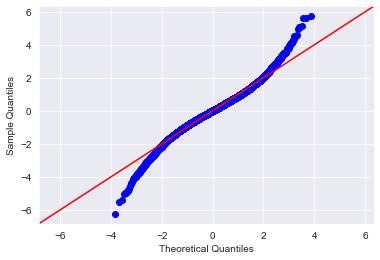

In [297]:
x_p3 = prepped_log.drop('psf', axis=1)
y_p3 = prepped_log['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p3, y_p3, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model3 = model_outlier2(X_train, X_test, y_train, y_test)

<AxesSubplot:xlabel='psf'>

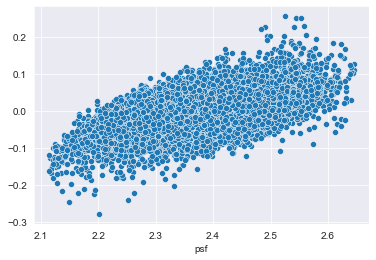

In [298]:
sns.scatterplot(y_p3,prepped_model3.resid)

Train R2:  0.7644111414200676
Test R2:  0.774669394061569
Train RMSE:  0.04500371135329161
Test RMSE:  0.04393034554709178


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     696.6
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:43:08   Log-Likelihood:                 29026.
No. Observations:               17256   AIC:                        -5.789e+04
Df Residuals:                   17175   BIC:                        -5.726e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0027    8.8e-05    -30.574      0.000      -0.003      -0.003
bedrooms        -0.0135      0.000    -28.747      0.000      -0.014      -0.013
bathrooms       -0.0034      0.001     -4.424      0.000      -0.005      -0.002
floors          -0.0250      0.001    -23.787      0.000      -0.027      -0.023
waterfront       0.1363      0.005     29.786      0.000       0.127       0.145
condition        0.0131      0.001     21.681      0.000       0.012       0.014
grade            0.0084      0.000     18.589      0.000       0.007       0.009
yr_built      9.042e-05   2.05e-05      4.409      0.000    5.02e-05       0.000
zipcode       2.103e-05   4.13e-07     50.863      0.000    2.02e-05    2.18e-05
livtolot        -0.0271      0.002    -13.039      0.000      -0.031      -0.023
has_basement     0.0509      0.001     57.385      0.000       0.049       0.053
rec_reno         0.0222      0.002      9.727      0.000       0.018       0.027
location        -0.0305      0.002    -13.644      0.000      -0.035      -0.026
zone             0.0291      0.001     29.191      0.000       0.027       0.031
zip_98002       -0.0078      0.004     -1.751      0.080      -0.016       0.001
zip_98003        0.0051      0.004      1.294      0.196      -0.003       0.013
zip_98004        0.1200      0.003     40.248      0.000       0.114       0.126
zip_98005        0.0385      0.004      9.968      0.000       0.031       0.046
zip_98006        0.0323      0.002     13.242      0.000       0.028       0.037
zip_98007        0.0281      0.004      6.684      0.000       0.020       0.036
zip_98008        0.0266      0.003      8.689      0.000       0.021       0.033
zip_98010       -0.0717      0.005    -13.336      0.000      -0.082      -0.061
zip_98011       -0.0216      0.004     -5.936      0.000      -0.029      -0.014
zip_98014       -0.0989      0.005    -20.127      0.000      -0.109      -0.089
zip_98019       -0.1082      0.004    -27.442      0.000      -0.116      -0.101
zip_98022       -0.1008      0.004    -25.180      0.000      -0.109      -0.093
zip_98023       -0.0039      0.003     -1.122      0.262      -0.011       0.003
zip_98024       -0.0771      0.006    -13.276      0.000      -0.088      -0.066
zip_98027        0.0063      0.003      2.481      0.013       0.001       0.011
zip_98028       -0.0227      0.003     -7.381      0.000      -0.029      -0.017
zip_98029        0.0184      0.003      6.359      0.000       0.013       0.024
zip_98030        0.0081      0.004      1.958      0.050   -9.13e-06       0.016
zip_98031        0.0192      0.004      4.736      0.000       0.011       0.027
zip_98032        0.0028      0.005      0.536      0.592      -0.007       0.013
zip_98033        0.0541      0.002     21.780      0.000       0.049       0.059
zip_9

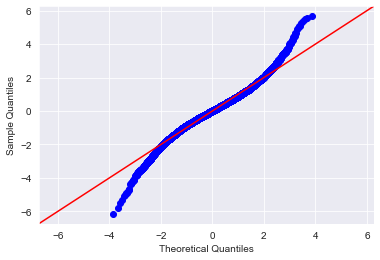

In [299]:
x_p4 = prepped_sqrt.drop('psf', axis=1)
y_p4 = prepped_sqrt['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p4, y_p4, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model4 = model_outlier2(X_train, X_test, y_train, y_test)

<AxesSubplot:xlabel='psf'>

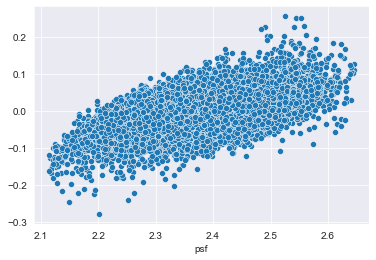

In [300]:
sns.scatterplot(y_p3,prepped_model3.resid)

<AxesSubplot:xlabel='psf'>

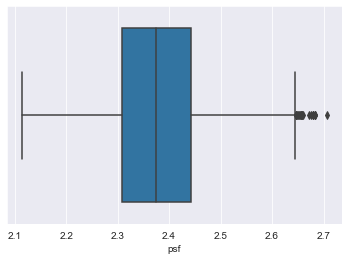

In [307]:
sns.boxplot(y_p4)